# Telecom churn prediction

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats.mstats import winsorize

import re
import gc
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [3]:
df = pd.read_csv('Telecom_customer churn.csv')

In [4]:
print(df.shape) # row x columns of data
print(df.ndim) # dimension of data
print(df.size) # size of data

(100000, 100)
2
10000000


In [5]:
df.describe()

rev_Mean      mou_Mean   totmrc_Mean       da_Mean   ovrmou_Mean  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99643.000000   
mean      58.719985    513.559937     46.179136      0.888828     41.072247   
std       46.291677    525.168140     23.623489      2.177619     97.296150   
min       -6.167500      0.000000    -26.915000      0.000000      0.000000   
25%       33.260000    150.750000     30.000000      0.000000      0.000000   
50%       48.195000    355.500000     44.990000      0.247500      2.750000   
75%       70.750000    703.000000     59.990000      0.990000     42.000000   
max     3843.262500  12206.750000    409.990000    159.390000   4320.750000   

        ovrrev_Mean   vceovr_Mean   datovr_Mean     roam_Mean    change_mou  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99109.000000   
mean      13.559560     13.295062      0.261318      1.286405    -13.933818   
std       30.500885     30.056089      3.126531     14.711374    276.087509   
min        0.000000      0.000000      0.000000      0.000000  -3875.000000   
25%        0.000000      0.000000      0.000000      0.000000    -87.000000   
50%        1.000000      0.682500      0.000000      0.000000     -6.250000   
75%       14.437500     14.025000      0.000000      0.235000     63.000000   
max     1102.400000    896.087500    423.540000   3685.200000  31219.250000   

         change_rev  drop_vce_Mean  drop_dat_Mean  blck_vce_Mean  \
count  99109.000000  100000.000000  100000.000000  100000.000000   
mean      -1.021067       5.955085       0.040520       4.022917   
std       50.363209       8.954715       0.877136      10.672202   
min    -1107.740000       0.000000       0.000000       0.000000   
25%       -7.365000       0.666667       0.000000       0.000000   
50%       -0.315000       3.000000       0.000000       1.000000   
75%        1.642500       7.666667       0.000000       3.666667   
max     9963.657500     232.666667     207.333333     385.333333   

       blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  plcd_vce_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.025777      27.784905       0.029810     144.881677   
std         1.490255      38.358734       0.496970     158.267711   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.000000       0.000000      38.333333   
50%         0.000000      16.000000       0.000000     100.333333   
75%         0.000000      36.000000       0.000000     198.666667   
max       413.333333     848.666667      81.666667    2289.000000   

       plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.870548      55.085152       0.047590     108.892535   
std         9.053901      86.841198       2.127422     118.580079   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.333333       0.000000      28.666667   
50%         0.000000      26.666667       0.000000      75.666667   
75%         0.000000      71.333333       0.000000     149.666667   
max       733.666667    3369.333333     517.333333    1894.333333   

       comp_dat_Mean  custcare_Mean  ccrndmou_Mean    cc_mou_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.774442       1.790838       4.666880       3.683328   
std         8.129844       5.315570      12.761953      10.539981   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.666667       4.000000       2.873333   
max       559.333333     675.333333     861.333333     602.950000   

       inonemin_Mean  threeway_Mean  mou_cvce_Mean  mou_cdat_Mean  \
count  100000.000000  100000.000000  10

# Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [7]:
df = df.drop(columns=['Customer_ID'])

In [8]:
# We want to list the columns in 3 categories.
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)
    columns_categories(df)

In [9]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

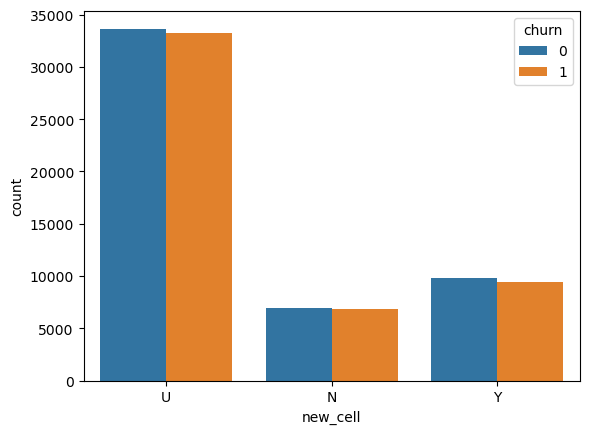

churn            0         1
new_cell                    
N         0.503373  0.496627
U         0.503049  0.496951
Y         0.509715  0.490285

In [10]:
# new_cell vs churn
sns.countplot(x= "new_cell", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('new_cell')["churn"].value_counts(normalize=True).unstack(fill_value=0)

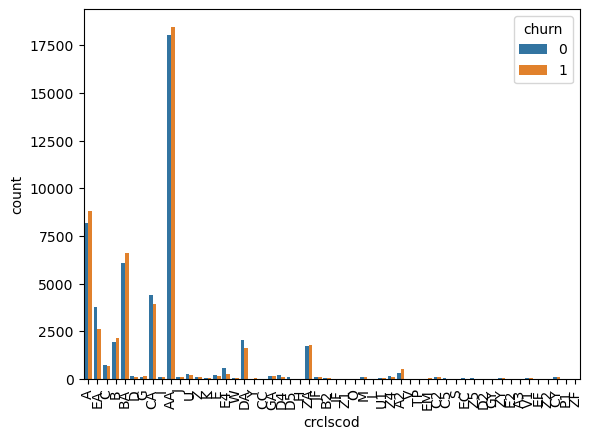

churn            0         1
crclscod                    
A         0.482702  0.517298
A2        0.384437  0.615563
A3        0.333333  0.666667
AA        0.494316  0.505684
B         0.475669  0.524331
B2        0.467890  0.532110
BA        0.478724  0.521276
C         0.520604  0.479396
C2        0.527778  0.472222
C5        0.703704  0.296296
CA        0.531317  0.468683
CC        0.520000  0.480000
CY        0.547368  0.452632
D         0.550607  0.449393
D2        0.600000  0.400000
D4        0.627907  0.372093
D5        0.807018  0.192982
DA        0.551104  0.448896
E         0.592920  0.407080
E2        0.857143  0.142857
E4        0.693878  0.306122
EA        0.590279  0.409721
EC        0.645833  0.354167
EF        0.500000  0.500000
EM        0.421053  0.578947
G         0.460581  0.539419
GA        0.501779  0.498221
GY        0.441176  0.558824
H         0.777778  0.222222
I         0.506173  0.493827
IF        0.500000  0.500000
J         0.531579  0.468421
JF        0.422680  0.577320
K         0.452830  0.547170
L         0.666667  0.333333
M         0.502959  0.497041
O         0.680000  0.320000
P1        0.333333  0.666667
S         1.000000  0.000000
TP        0.200000  0.800000
U         0.527083  0.472917
U1        0.530303  0.469697
V         0.000000  1.000000
V1        0.614286  0.385714
W         0.587629  0.412371
Y         0.407407  0.592593
Z         0.507853  0.492147
Z1        0.416667  0.583333
Z2        0.600000  0.400000
Z4        0.588933  0.411067
Z5        0.678571  0.321429
ZA        0.496708  0.503292
ZF        1.000000  0.000000
ZY        0.521008  0.478992

In [11]:
# crclscod vs churn
sns.countplot(x= "crclscod", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()
df.groupby('crclscod')["churn"].value_counts(normalize=True).unstack(fill_value=0)

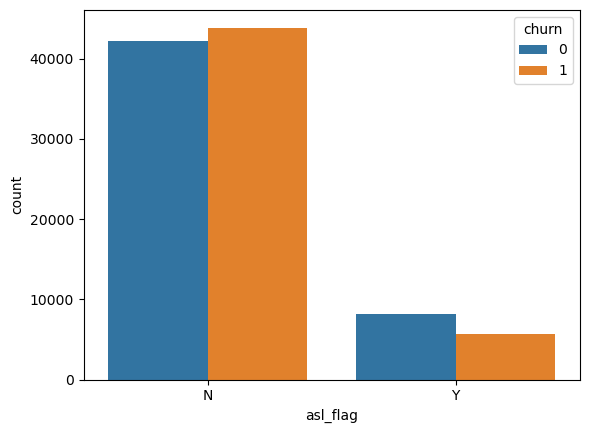

churn            0         1
asl_flag                    
N         0.490402  0.509598
Y         0.590700  0.409300

In [12]:
# asl_flag vs churn
sns.countplot(x= "asl_flag", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('asl_flag')["churn"].value_counts(normalize=True).unstack(fill_value=0)

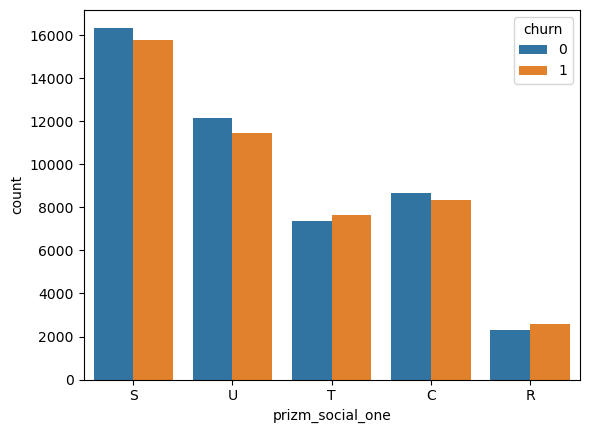

churn                    0         1
prizm_social_one                    
C                 0.509226  0.490774
R                 0.472932  0.527068
S                 0.509238  0.490762
T                 0.491627  0.508373
U                 0.515182  0.484818

In [13]:
# prizm_social_one vs churn
sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)


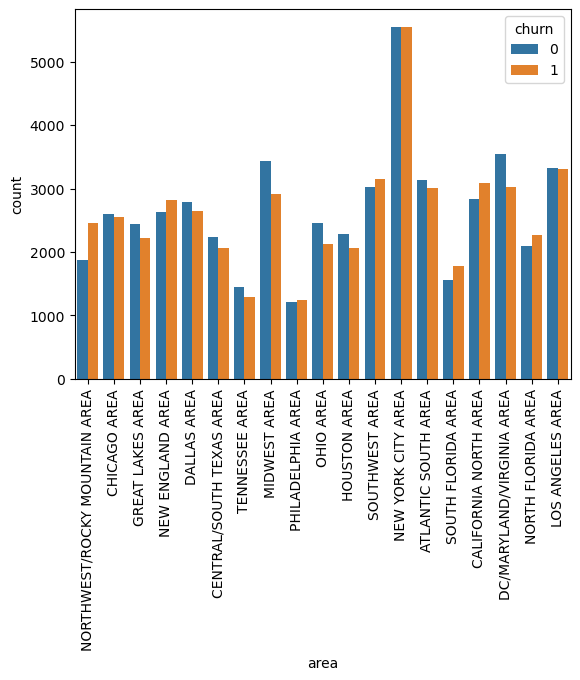

churn                                 0         1
area                                             
ATLANTIC SOUTH AREA            0.510274  0.489726
CALIFORNIA NORTH AREA          0.478945  0.521055
CENTRAL/SOUTH TEXAS AREA       0.521517  0.478483
CHICAGO AREA                   0.504766  0.495234
DALLAS AREA                    0.512532  0.487468
DC/MARYLAND/VIRGINIA AREA      0.539668  0.460332
GREAT LAKES AREA               0.523553  0.476447
HOUSTON AREA                   0.524994  0.475006
LOS ANGELES AREA               0.501808  0.498192
MIDWEST AREA                   0.540971  0.459029
NEW ENGLAND AREA               0.482575  0.517425
NEW YORK CITY AREA             0.499730  0.500270
NORTH FLORIDA AREA             0.480000  0.520000
NORTHWEST/ROCKY MOUNTAIN AREA  0.430915  0.569085
OHIO AREA                      0.536245  0.463755
PHILADELPHIA AREA              0.493459  0.506541
SOUTH FLORIDA AREA             0.466387  0.533613
SOUTHWEST AREA                 0.489898  0.510102
TENNESSEE AREA                 0.528681  0.471319

In [14]:
# area vs churn
sns.countplot(x= "area", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()
df.groupby('area')["churn"].value_counts(normalize=True).unstack(fill_value=0)

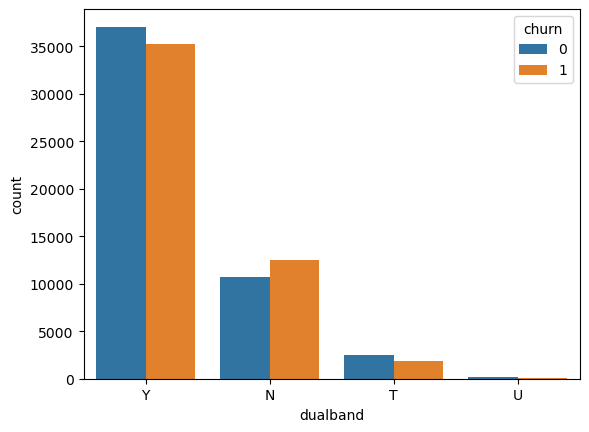

churn            0         1
dualband                    
N         0.463183  0.536817
T         0.578082  0.421918
U         0.653153  0.346847
Y         0.512738  0.487262

In [15]:
# dualband vs churn
sns.countplot(x= "dualband", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dualband')["churn"].value_counts(normalize=True).unstack(fill_value=0)

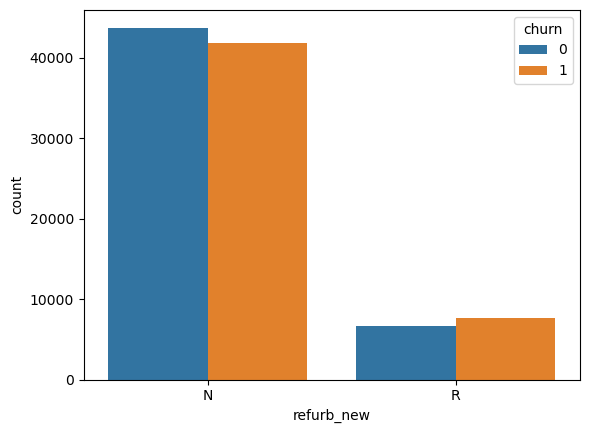

churn              0         1
refurb_new                    
N           0.510895  0.489105
R           0.465639  0.534361

In [16]:
# refurb_new vs churn
sns.countplot(x= "refurb_new", hue="churn", data=df);
plt.xticks()
plt.show()

df.groupby('refurb_new')["churn"].value_counts(normalize=True).unstack(fill_value=0)

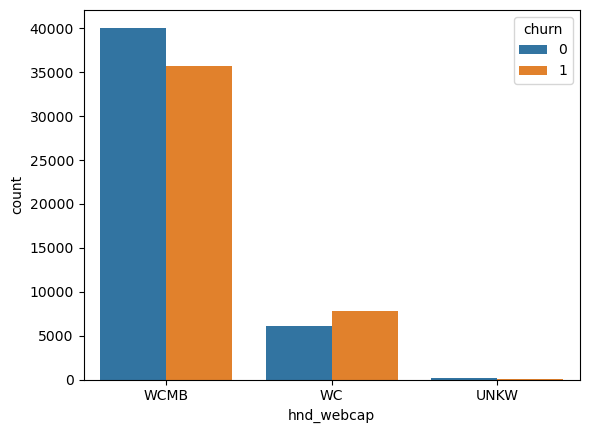

churn              0         1
hnd_webcap                    
UNKW        0.634043  0.365957
WC          0.436972  0.563028
WCMB        0.529201  0.470799

In [17]:
# hnd_webcap vs churn
sns.countplot(x= "hnd_webcap", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('hnd_webcap')["churn"].value_counts(normalize=True).unstack(fill_value=0)

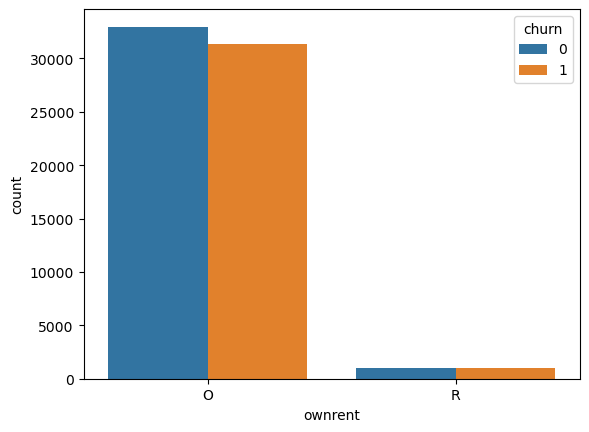

churn           0         1
ownrent                    
O        0.512803  0.487197
R        0.480597  0.519403

In [18]:
sns.countplot(x= "ownrent", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ownrent')["churn"].value_counts(normalize=True).unstack(fill_value=0)

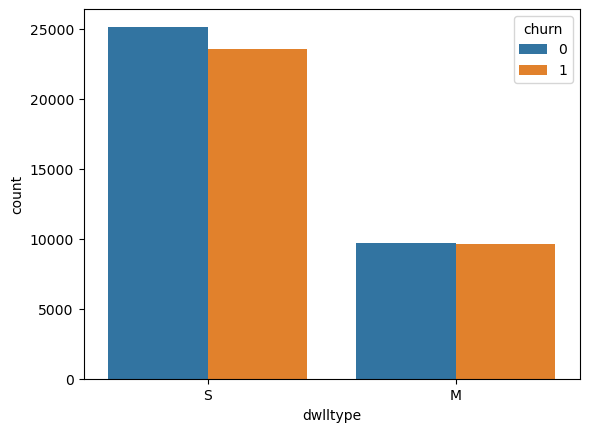

churn            0         1
dwlltype                    
M         0.501345  0.498655
S         0.516069  0.483931

In [19]:
sns.countplot(x= "dwlltype", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwlltype')["churn"].value_counts(normalize=True).unstack(fill_value=0)

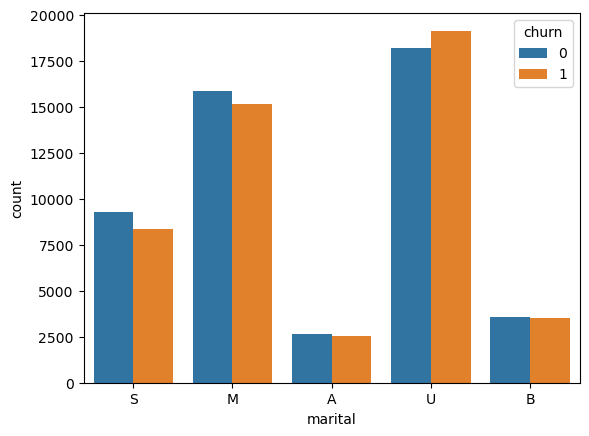

churn           0         1
marital                    
A        0.510311  0.489689
B        0.503092  0.496908
M        0.511336  0.488664
S        0.525330  0.474670
U        0.487344  0.512656

In [20]:
sns.countplot(x= "marital", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('marital')["churn"].value_counts(normalize=True).unstack(fill_value=0)

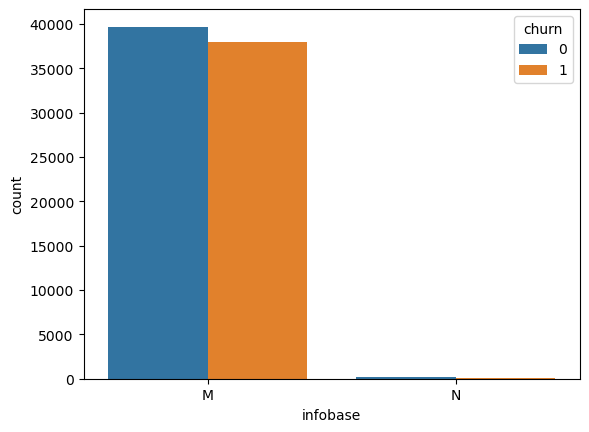

churn            0         1
infobase                    
M         0.510779  0.489221
N         0.669643  0.330357

In [21]:
sns.countplot(x= "infobase", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('infobase')["churn"].value_counts(normalize=True).unstack(fill_value=0)

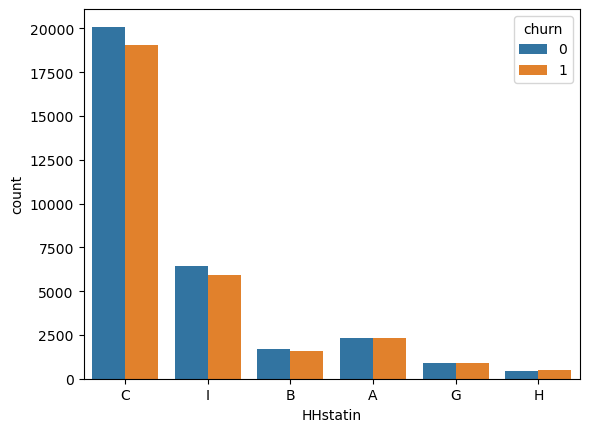

churn            0         1
HHstatin                    
A         0.500857  0.499143
B         0.520333  0.479667
C         0.513623  0.486377
G         0.497169  0.502831
H         0.477790  0.522210
I         0.519025  0.480975

In [22]:
sns.countplot(x= "HHstatin", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('HHstatin')["churn"].value_counts(normalize=True).unstack(fill_value=0)

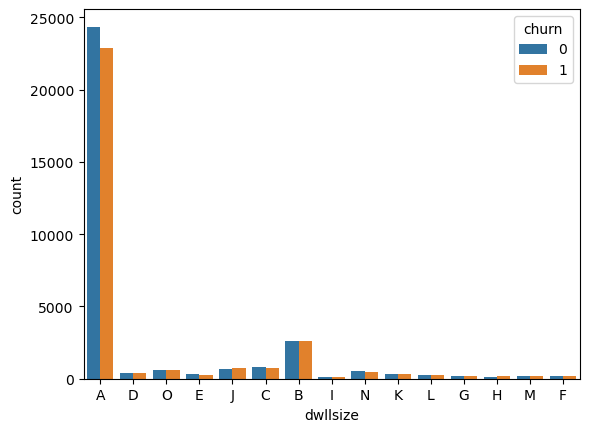

churn            0         1
dwllsize                    
A         0.515772  0.484228
B         0.504323  0.495677
C         0.524382  0.475618
D         0.491299  0.508701
E         0.539595  0.460405
F         0.507317  0.492683
G         0.515068  0.484932
H         0.480132  0.519868
I         0.466418  0.533582
J         0.485315  0.514685
K         0.497731  0.502269
L         0.541016  0.458984
M         0.485333  0.514667
N         0.513000  0.487000
O         0.513652  0.486348

In [23]:
sns.countplot(x= "dwllsize", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwllsize')["churn"].value_counts(normalize=True).unstack(fill_value=0)

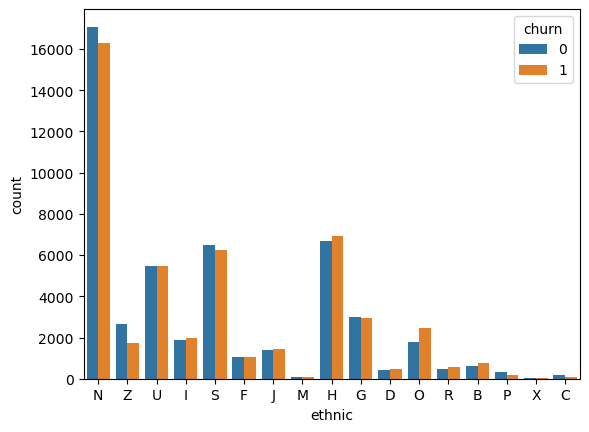

churn          0         1
ethnic                    
B       0.446870  0.553130
C       0.684426  0.315574
D       0.466513  0.533487
F       0.496474  0.503526
G       0.504227  0.495773
H       0.491669  0.508331
I       0.487798  0.512202
J       0.483791  0.516209
M       0.463087  0.536913
N       0.511516  0.488484
O       0.419247  0.580753
P       0.625514  0.374486
R       0.468451  0.531549
S       0.508669  0.491331
U       0.499772  0.500228
X       0.674419  0.325581
Z       0.602938  0.397062

In [24]:
sns.countplot(x= "ethnic", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ethnic')["churn"].value_counts(normalize=True).unstack(fill_value=0)

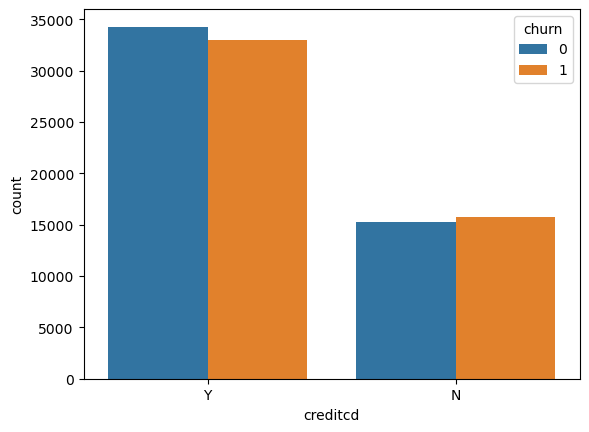

churn            0         1
creditcd                    
N         0.491719  0.508281
Y         0.509787  0.490213

In [25]:
# creditcd vs churn
sns.countplot(x= "creditcd", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('creditcd')["churn"].value_counts(normalize=True).unstack(fill_value=0)

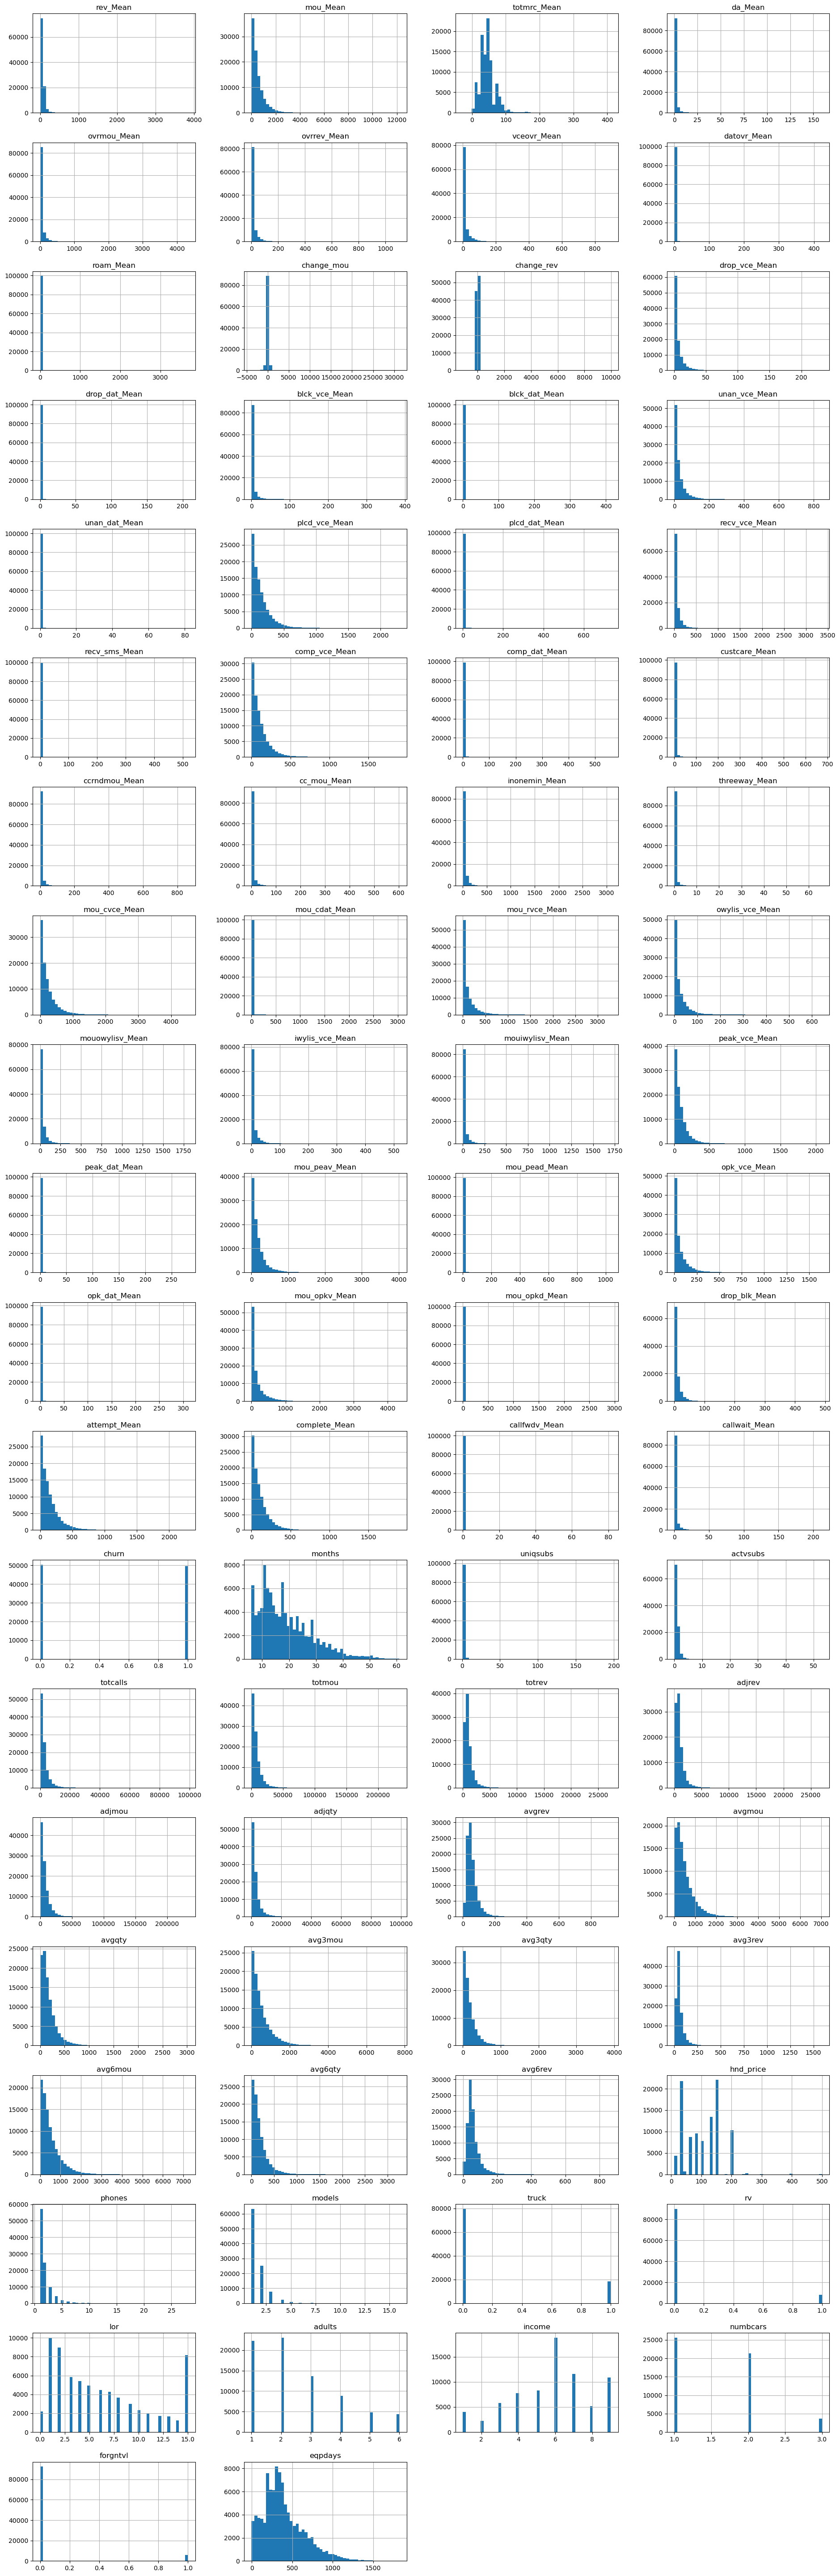

In [26]:
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4));

In [27]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 50326
num of pepole who churn: 49317


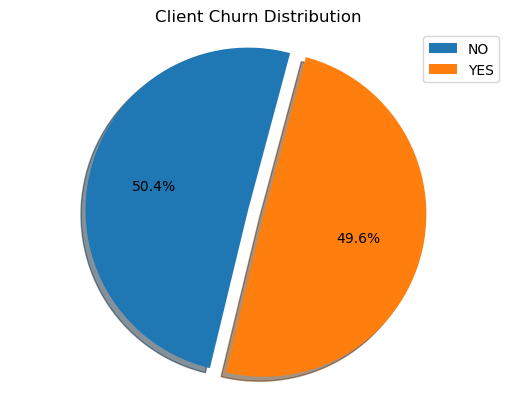

In [28]:
# ratio of those who churn and those who don't
sizes = [48401,47647]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

# Filling Missing values

          Missing Values  Percentage
numbcars           49366      49.366
dwllsize           38308      38.308
HHstatin           37923      37.923
ownrent            33706      33.706
dwlltype           31909      31.909
lor                30190      30.190
income             25436      25.436
adults             23019      23.019
infobase           22079      22.079


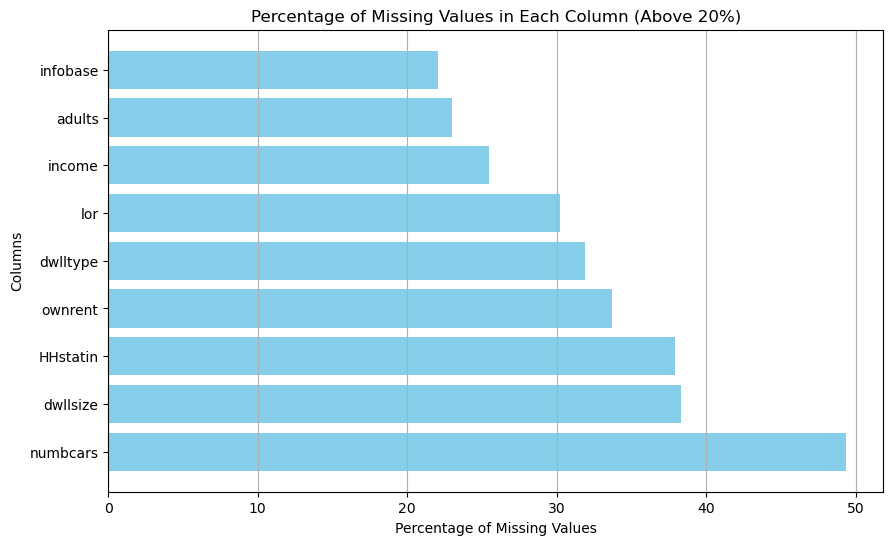

In [29]:
import matplotlib.pyplot as plt

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame with the missing values count and percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Filter columns with more than 20% missing values
missing_data_filtered = missing_data[missing_data['Percentage'] > 20]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data_filtered.sort_values(by='Percentage', ascending=False)

# Display the DataFrame
print(missing_data_sorted)

# Plot the missing values
plt.figure(figsize=(10, 6))
plt.barh(missing_data_sorted.index, missing_data_sorted['Percentage'], color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Each Column (Above 20%)')
plt.grid(axis='x')
plt.show()


In [30]:
# Drop columns with more than 20% missing values from the original DataFrame
columns_to_drop = missing_data_sorted.index
df_cleaned = df.drop(columns=columns_to_drop)
columns_to_drop

Index(['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype', 'lor',
       'income', 'adults', 'infobase'],
      dtype='object')

In [31]:
# Filter columns with less than 20% missing values
threshold = 20
columns_less_than_20_missing = df_cleaned.columns[(df_cleaned.isnull().mean() * 100) < threshold]
df_filtered = df_cleaned[columns_less_than_20_missing]


In [32]:
import pandas as pd
import scipy.stats as stats

# Assuming df_cleaned is your DataFrame with columns having less than 20% missing values

# Filter columns with less than 20% missing values
threshold = 20
columns_less_than_20_missing = df_cleaned.columns[(df_cleaned.isnull().mean() * 100) < threshold]
df_filtered = df_cleaned[columns_less_than_20_missing]

# Calculate the skewness for each numerical column
skewness_values = df_filtered.skew()
skewness_data = pd.DataFrame({'Skewness': skewness_values})

# Display the skewness values
print(skewness_data)

# Suggest whether to use mean or median based on skewness
for col, skewness in skewness_data['Skewness'].items():
    if skewness > 1 or skewness < -1:
        print(f"{col}: Highly skewed (skewness = {skewness:.2f}). Use median.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{col}: Moderately skewed (skewness = {skewness:.2f}). Consider using median.")
    else:
        print(f"{col}: Approximately symmetric (skewness = {skewness:.2f}). Use mean.")


                   Skewness
rev_Mean           9.152624
mou_Mean           2.314370
totmrc_Mean        1.641696
da_Mean           10.813065
ovrmou_Mean        7.418083
ovrrev_Mean        6.221424
vceovr_Mean        6.014158
datovr_Mean       58.007872
roam_Mean        168.807785
change_mou        14.390949
change_rev        80.535420
drop_vce_Mean      4.611948
drop_dat_Mean    149.640425
blck_vce_Mean      9.728314
blck_dat_Mean    224.599850
unan_vce_Mean      4.242731
unan_dat_Mean     81.813561
plcd_vce_Mean      2.650358
plcd_dat_Mean     30.273577
recv_vce_Mean      5.627871
recv_sms_Mean    168.439203
comp_vce_Mean      2.625488
comp_dat_Mean     28.636399
custcare_Mean     32.032501
ccrndmou_Mean     11.565862
cc_mou_Mean       10.571780
inonemin_Mean      8.905458
threeway_Mean     17.001073
mou_cvce_Mean      2.564346
mou_cdat_Mean     49.327627
mou_rvce_Mean      3.085546
owylis_vce_Mean    3.432738
mouowylisv_Mean    5.525898
iwylis_vce_Mean    5.638544
mouiwylisv_Mean    6

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your DataFrame
# Define columns based on skewness
highly_skewed_columns = [
    'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 
    'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 
    'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 
    'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 
    'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 
    'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 
    'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 
    'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 
    'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 
    'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs', 
    'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 
    'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'phones', 
    'models', 'truck', 'rv', 'forgntvl', 'eqpdays'
]

approximately_symmetric_columns = [
    'churn', 'hnd_price'
]

# Fill missing values in numerical columns
for col in df_cleaned.columns:
    if col in highly_skewed_columns:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)
    elif col in approximately_symmetric_columns:
        mean_value = df_cleaned[col].mean()
        df_cleaned[col].fillna(mean_value, inplace=True)

# Fill missing values in remaining columns using mode
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)

# Calculate the number of missing values in each column
missing_values = df_cleaned.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df_cleaned)) * 100

# Create a DataFrame with the missing values count and percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Filter columns with more than 0% missing values
missing_data_filtered = missing_data[missing_data['Percentage'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data_filtered.sort_values(by='Percentage', ascending=False)

# Display the DataFrame
print(missing_data_sorted)

# Check if there are any columns with missing values left to plot
if not missing_data_sorted.empty:
    # Plot the missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(y=missing_data_sorted.index, x=missing_data_sorted['Percentage'], palette='coolwarm')
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Columns')
    plt.title('Percentage of Missing Values in Each Column (Non-Zero)')
    plt.grid(axis='x')
    plt.show()
else:
    print("No columns with missing values left to plot.")


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
No columns with missing values left to plot.


In [34]:
df_cleaned.info()
df_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 90 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          100000 non-null  float64
 1   mou_Mean          100000 non-null  float64
 2   totmrc_Mean       100000 non-null  float64
 3   da_Mean           100000 non-null  float64
 4   ovrmou_Mean       100000 non-null  float64
 5   ovrrev_Mean       100000 non-null  float64
 6   vceovr_Mean       100000 non-null  float64
 7   datovr_Mean       100000 non-null  float64
 8   roam_Mean         100000 non-null  float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

(100000, 90)

In [35]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

print("Data saved successfully as 'cleaned_data.csv'")

Data saved successfully as 'cleaned_data.csv'


# Outlier detection and removal

In [36]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')

# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize an empty list to store the percentage of outliers for each column
outlier_percentages = []

# Iterate through each numerical column
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using IQR boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers using the calculated bounds
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Calculate percentage of outliers (including zero values)
    total_values = df[col].count()  # Total number of non-NaN values
    outliers_count = outliers.sum()  # Total number of outliers
    
    if total_values > 0:
        percentage_outliers = (outliers_count / total_values) * 100
    else:
        percentage_outliers = 0.0
    
    # Append column name and percentage of outliers to the list
    outlier_percentages.append((col, percentage_outliers))

# Sort the list of outlier percentages in descending order
outlier_percentages.sort(key=lambda x: x[1], reverse=True)

# Print the outlier percentages in highest to lowest order
for col, percentage in outlier_percentages:
    print(f"{col}: {percentage:.2f}%")


change_rev: 26.32%
roam_Mean: 18.91%
truck: 18.55%
plcd_dat_Mean: 14.98%
callwait_Mean: 14.31%
cc_mou_Mean: 14.27%
change_mou: 13.77%
datovr_Mean: 13.67%
da_Mean: 13.64%
ccrndmou_Mean: 13.46%
comp_dat_Mean: 13.39%
mou_cdat_Mean: 13.39%
custcare_Mean: 12.71%
vceovr_Mean: 11.60%
ovrmou_Mean: 11.53%
ovrrev_Mean: 11.39%
mouiwylisv_Mean: 11.32%
blck_vce_Mean: 10.70%
iwylis_vce_Mean: 10.36%
mou_opkd_Mean: 9.62%
opk_dat_Mean: 9.61%
peak_dat_Mean: 8.94%
mou_pead_Mean: 8.94%
threeway_Mean: 8.66%
phones: 8.41%
mouowylisv_Mean: 8.38%
mou_opkv_Mean: 8.30%
inonemin_Mean: 8.15%
rv: 8.12%
drop_blk_Mean: 7.61%
mou_rvce_Mean: 7.20%
drop_vce_Mean: 7.14%
opk_vce_Mean: 7.14%
totcalls: 7.11%
adjqty: 7.11%
recv_vce_Mean: 7.00%
unan_vce_Mean: 6.86%
owylis_vce_Mean: 6.66%
avg3rev: 6.16%
rev_Mean: 6.03%
totmou: 5.99%
adjmou: 5.98%
mou_peav_Mean: 5.87%
mou_cvce_Mean: 5.82%
avg6rev: 5.78%
forgntvl: 5.70%
totrev: 5.68%
adjrev: 5.65%
avg6qty: 5.61%
peak_vce_Mean: 5.47%
avg3qty: 5.38%
avgrev: 5.31%
avgqty: 5.25%
av

In [37]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest for outlier detection and removal
outlier_detector = IsolationForest(contamination=0.1)  # Adjust contamination parameter
outliers = outlier_detector.fit_predict(df[numerical_columns])
df = df[outliers != -1]  # Remove rows identified as outliers


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 99999
Data columns (total 90 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          90000 non-null  float64
 1   mou_Mean          90000 non-null  float64
 2   totmrc_Mean       90000 non-null  float64
 3   da_Mean           90000 non-null  float64
 4   ovrmou_Mean       90000 non-null  float64
 5   ovrrev_Mean       90000 non-null  float64
 6   vceovr_Mean       90000 non-null  float64
 7   datovr_Mean       90000 non-null  float64
 8   roam_Mean         90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce_Mean     90000 non-null  float64
 12  drop_dat_Mean     90000 non-null  float64
 13  blck_vce_Mean     90000 non-null  float64
 14  blck_dat_Mean     90000 non-null  float64
 15  unan_vce_Mean     90000 non-null  float64
 16  unan_dat_Mean     90000 non-null  float6

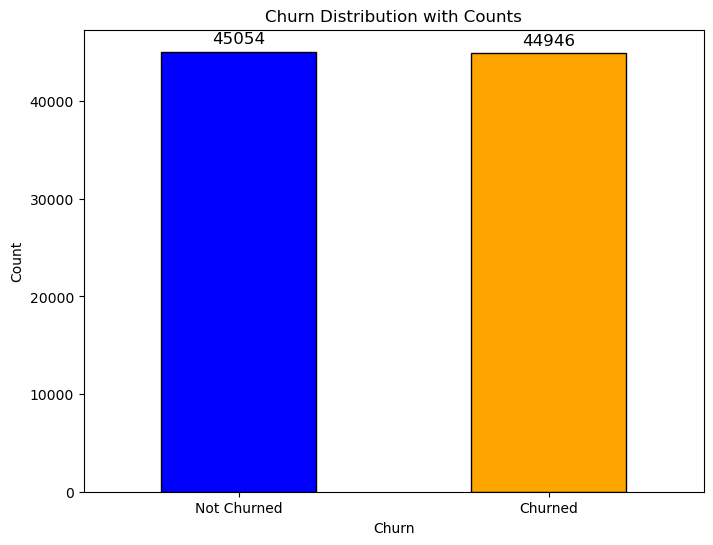

In [39]:
# Plot churn distribution with counts
plt.figure(figsize=(8, 6))
churn_counts = df['churn'].value_counts()

# Create the bar plot
bars = churn_counts.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')

# Add counts above the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Churn Distribution with Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)

# Show plot
plt.show()

# label encoding

In [40]:
# Select columns with data type 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Print the column names
print("Columns with object data type:")
print(object_columns)

# Calculate counts for each object column
counts = {col: df[col].value_counts() for col in object_columns}

# Print the counts
for col, count in counts.items():
    print(f"Column: {col}")
    print(count)
    print()

Columns with object data type:
Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')
Column: new_cell
U    61095
Y    17099
N    11806
Name: new_cell, dtype: int64

Column: crclscod
AA    34419
A     15559
BA    11269
CA     7260
EA     5295
B      3540
DA     3127
ZA     2970
C      1229
A2      847
E4      586
U       377
E       263
GA      247
D4      245
I       229
G       214
Z4      195
D       191
JF      179
CY      168
C2      167
J       161
Z       157
M       148
ZY      107
B2       98
D5       90
K        90
W        70
V1       69
C5       67
U1       55
Y        49
Z5       45
EM       44
EC       33
GY       29
O        20
E2       18
CC       18
IF       13
Z1       10
H         8
P1        5
D2        4
Z2        3
EF        3
L         3
TP        3
A3        2
S         1
V         1


In [41]:
df.to_csv('outlier removed.csv', index=False)

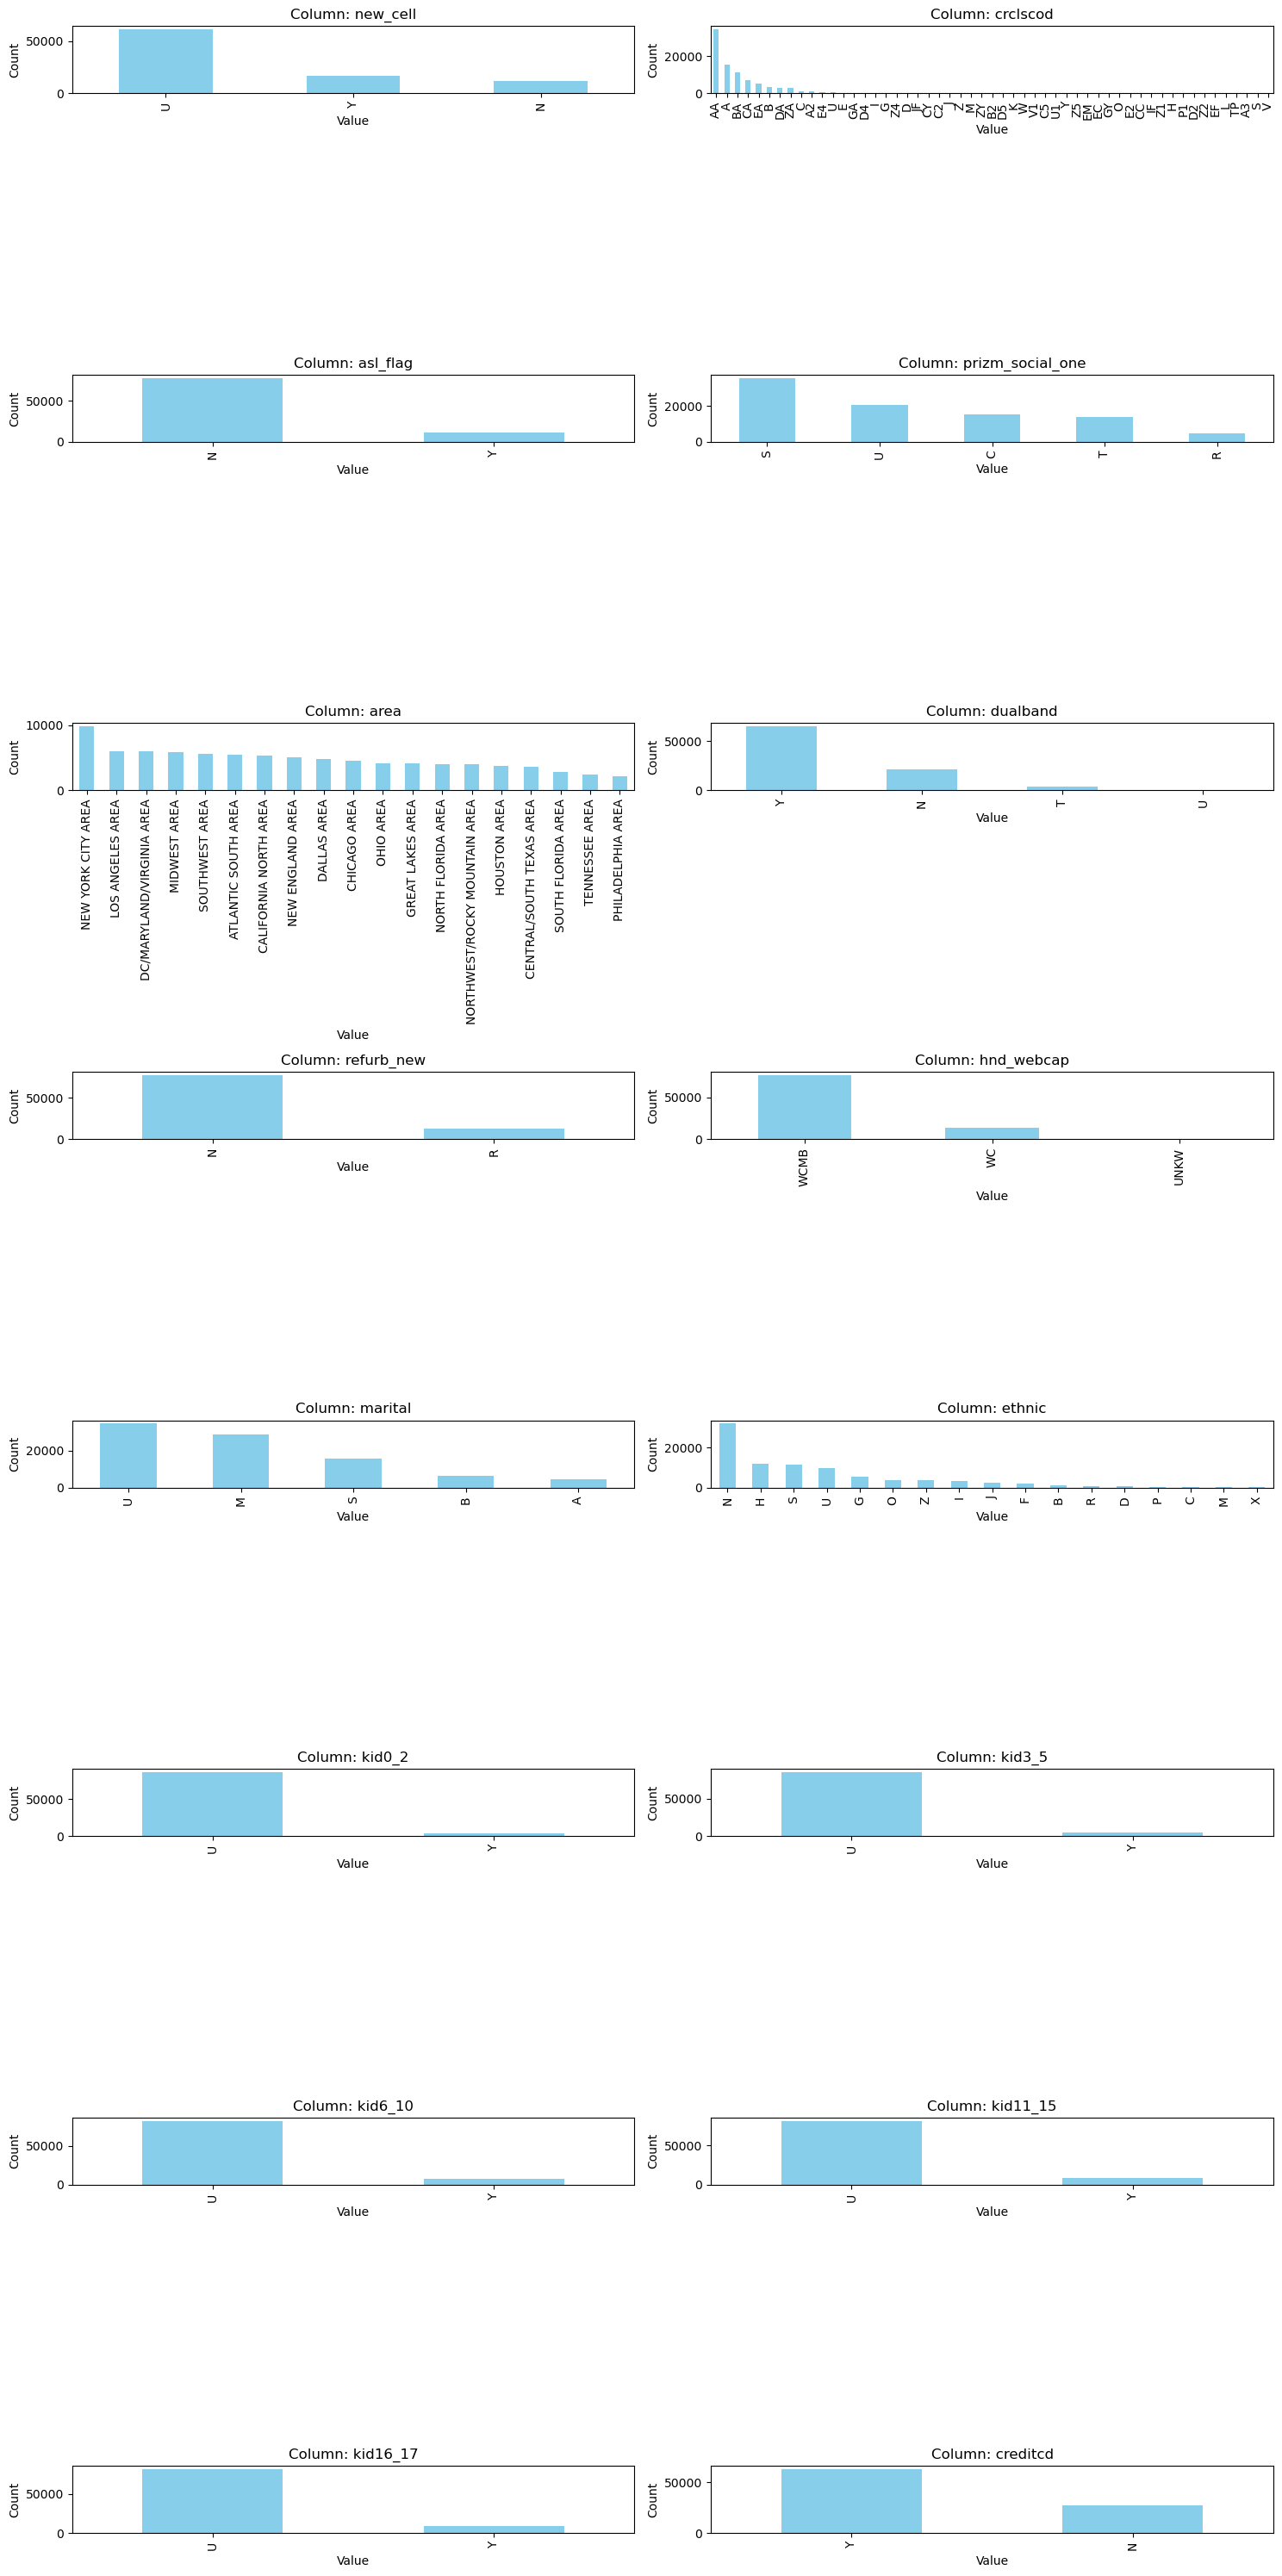

In [42]:
# Plotting each column
plt.figure(figsize=(15, 30))

# Loop through each object column and create a subplot
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(8, 2, i+1)  # Adjust the subplot grid as per the number of columns
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Column: {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each object column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 99999
Data columns (total 90 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          90000 non-null  float64
 1   mou_Mean          90000 non-null  float64
 2   totmrc_Mean       90000 non-null  float64
 3   da_Mean           90000 non-null  float64
 4   ovrmou_Mean       90000 non-null  float64
 5   ovrrev_Mean       90000 non-null  float64
 6   vceovr_Mean       90000 non-null  float64
 7   datovr_Mean       90000 non-null  float64
 8   roam_Mean         90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce_Mean     90000 non-null  float64
 12  drop_dat_Mean     90000 non-null  float64
 13  blck_vce_Mean     90000 non-null  float64
 14  blck_dat_Mean     90000 non-null  float64
 15  unan_vce_Mean     90000 non-null  float64
 16  unan_dat_Mean     90000 non-null  float6

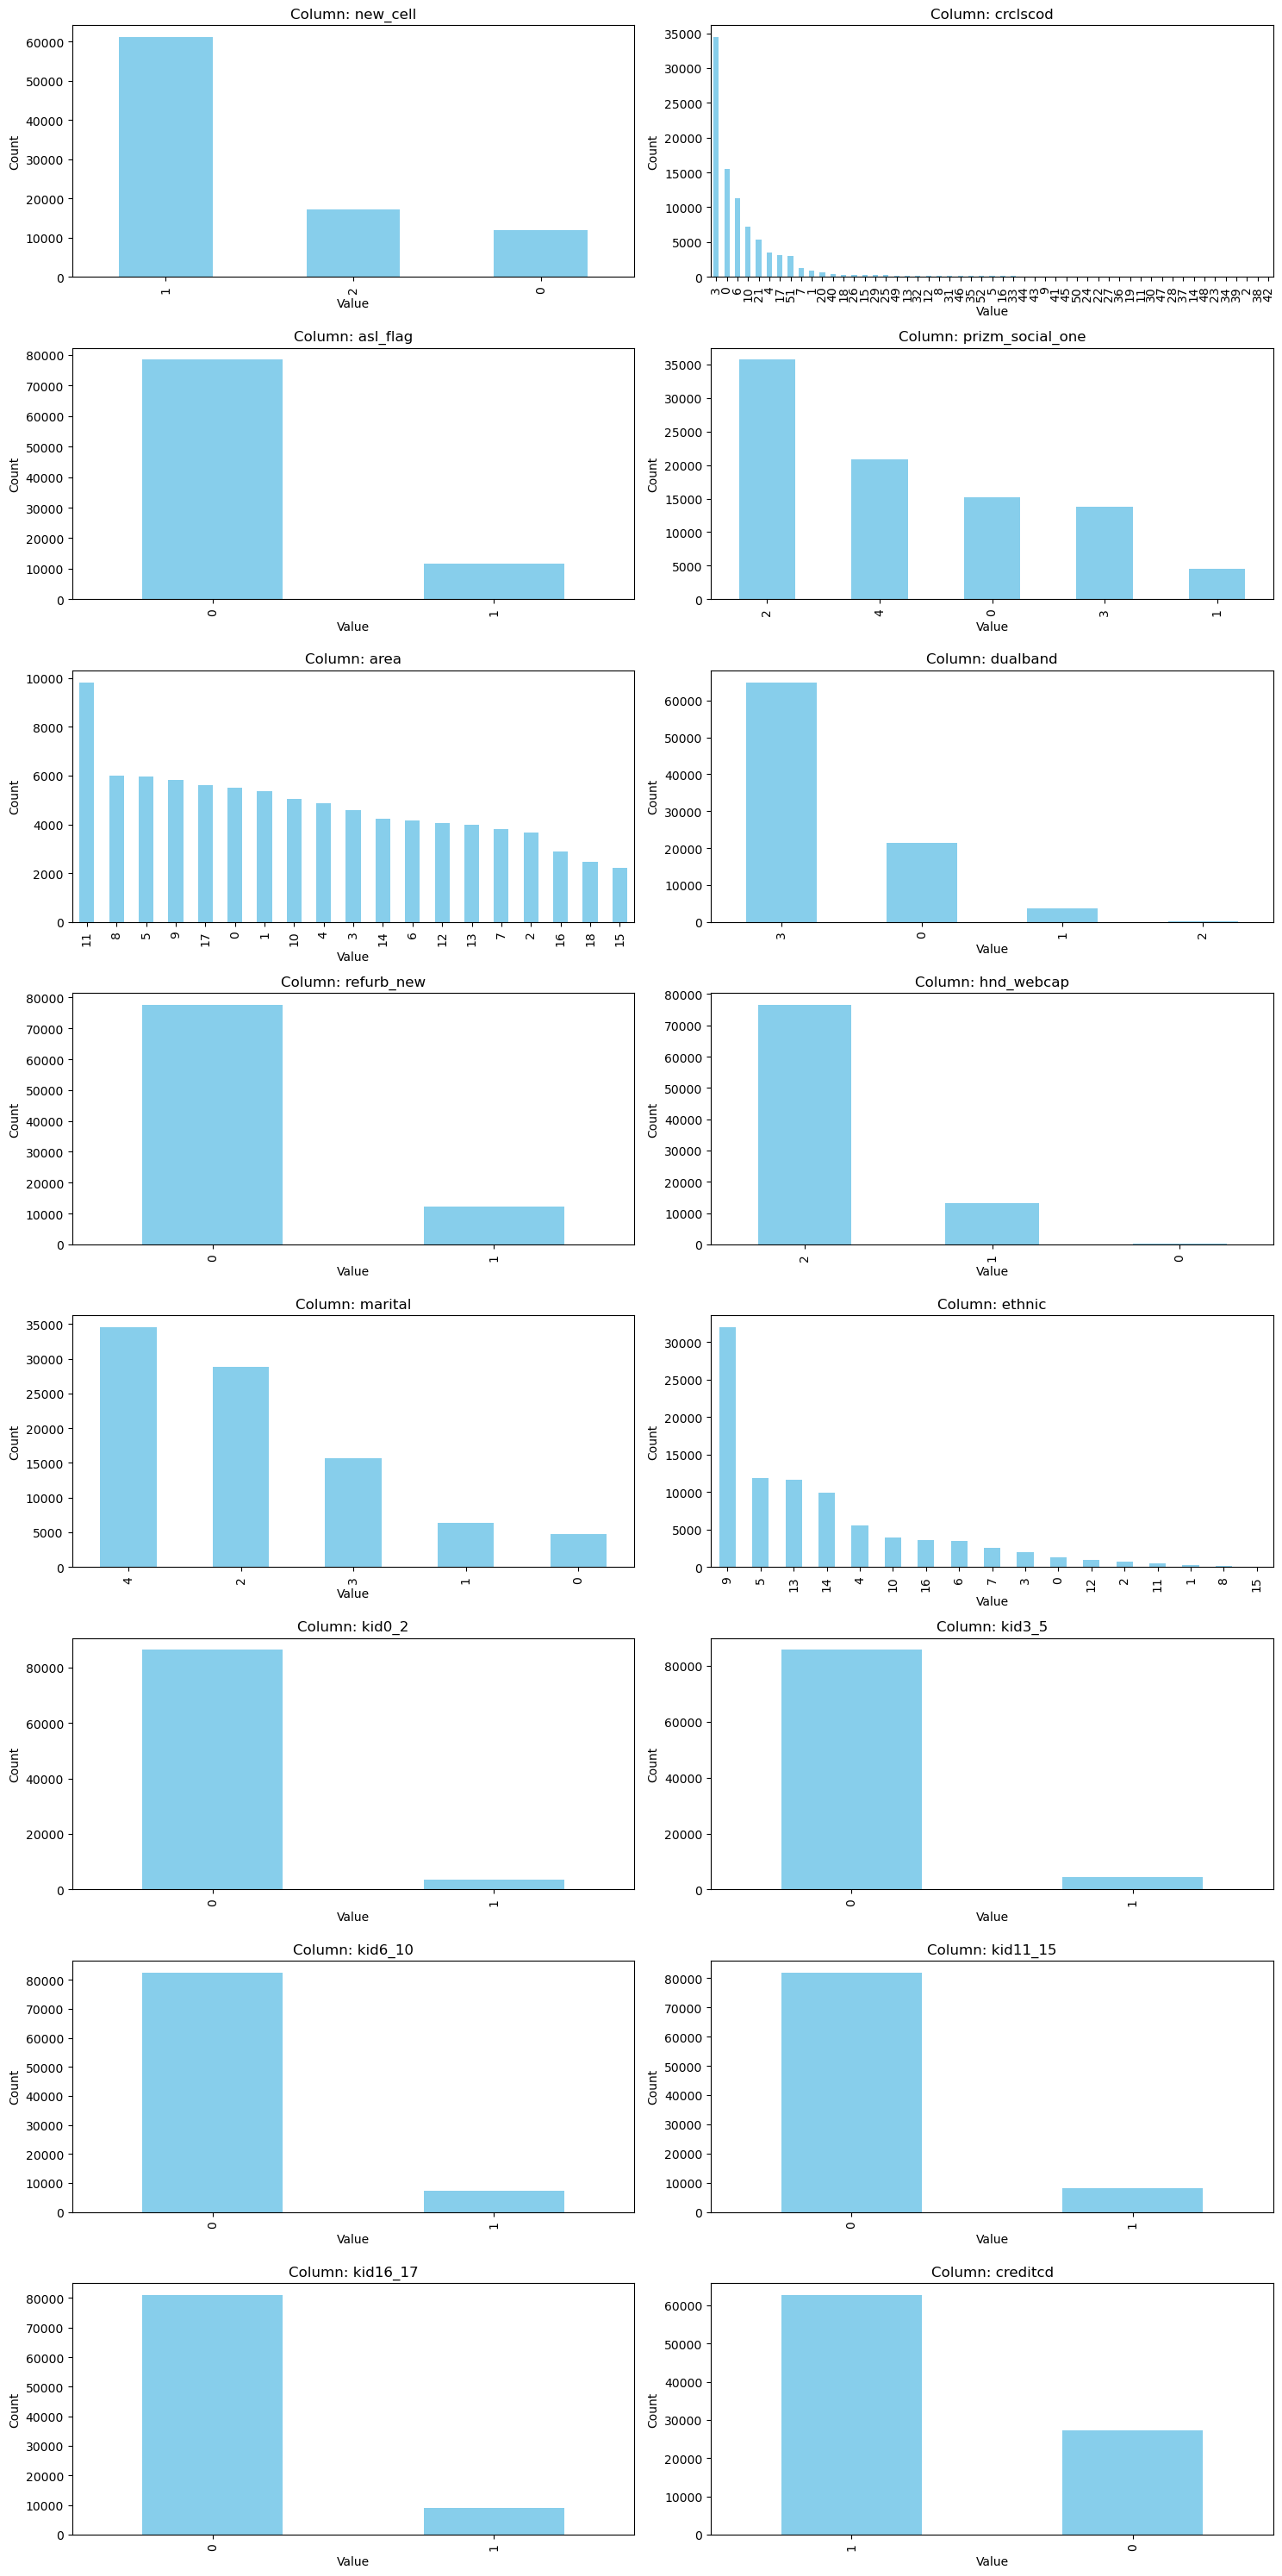

In [45]:
# Plotting each column
plt.figure(figsize=(15, 30))

# Loop through each object column and create a subplot
for i, col in enumerate(df.select_dtypes(include=['int32']).columns):
    plt.subplot(8, 2, i+1)  # Adjust the subplot grid as per the number of columns
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Column: {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [46]:
df.to_csv('cleaned_data22.csv', index=False)

# feature engineering

In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_data22.csv')

# List of _Mean features
mean_features = [
    'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 
    'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 
    'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 
    'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 
    'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 
    'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 
    'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 
    'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 
    'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 
    'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 
    'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 
    'callwait_Mean'
]

# Calculate correlation with churn
correlations = df[mean_features + ['churn']].corr()['churn'].drop('churn')

correlations

rev_Mean          -0.009759
mou_Mean          -0.061496
totmrc_Mean       -0.063207
da_Mean           -0.011377
ovrmou_Mean        0.034278
ovrrev_Mean        0.033569
vceovr_Mean        0.034020
datovr_Mean       -0.008818
roam_Mean          0.018528
drop_vce_Mean     -0.005363
drop_dat_Mean     -0.005979
blck_vce_Mean     -0.005506
blck_dat_Mean     -0.008357
unan_vce_Mean     -0.033900
unan_dat_Mean     -0.008296
plcd_vce_Mean     -0.049145
plcd_dat_Mean     -0.008939
recv_vce_Mean     -0.035068
recv_sms_Mean      0.003905
comp_vce_Mean     -0.053291
comp_dat_Mean     -0.007052
custcare_Mean     -0.041802
ccrndmou_Mean     -0.035152
cc_mou_Mean       -0.030647
inonemin_Mean     -0.026316
threeway_Mean     -0.026887
mou_cvce_Mean     -0.056881
mou_cdat_Mean     -0.004621
mou_rvce_Mean     -0.042091
owylis_vce_Mean   -0.040122
mouowylisv_Mean   -0.033786
iwylis_vce_Mean   -0.041551
mouiwylisv_Mean   -0.034964
peak_vce_Mean     -0.047732
peak_dat_Mean     -0.006163
mou_peav_Mean     -0

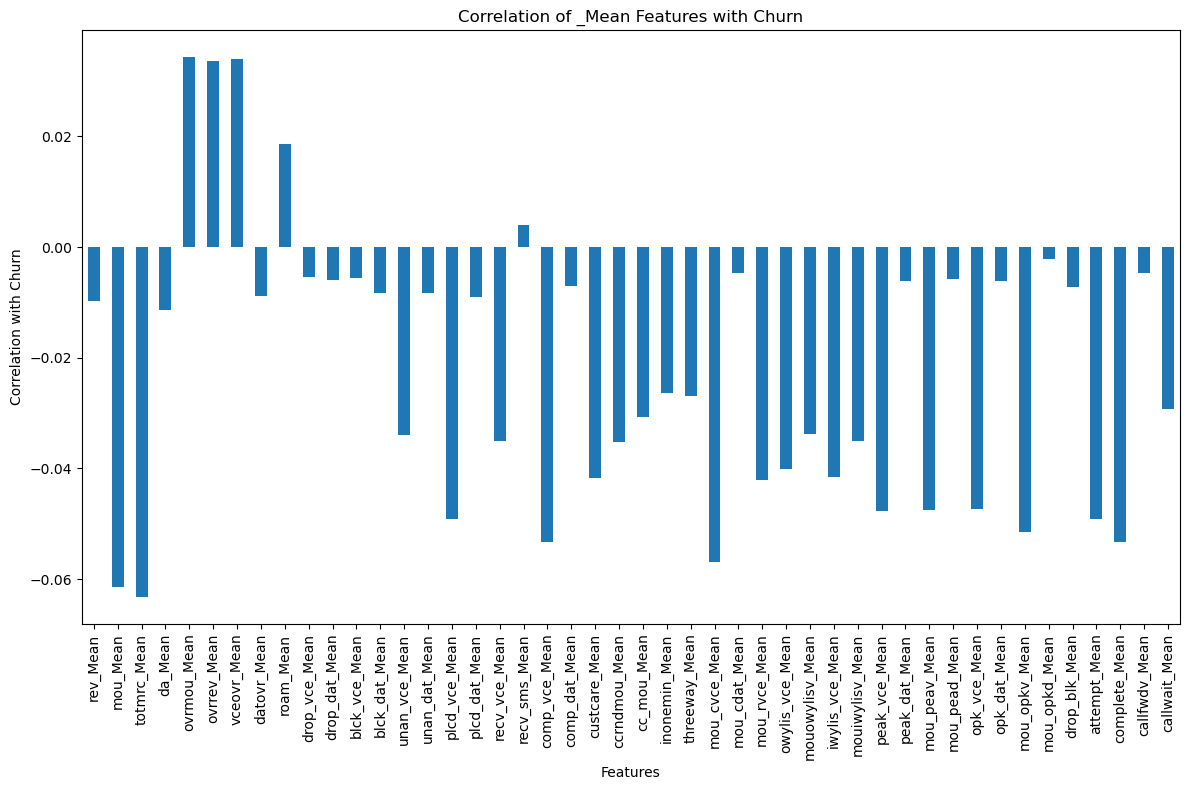

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_data22.csv')

# List of _Mean features
mean_features = [
    'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 
    'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 
    'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 
    'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 
    'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 
    'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 
    'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 
    'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 
    'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 
    'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 
    'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 
    'callwait_Mean'
]

# Calculate correlation with churn
correlations = df[mean_features + ['churn']].corr()['churn'].drop('churn')

# Plotting the bar graph
plt.figure(figsize=(12, 8))
correlations.plot(kind='bar')
plt.title('Correlation of _Mean Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_data22.csv')

# Existing features to keep
existing_features = ['recv_sms_Mean', 'roam_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'ovrmou_Mean', 'churn']

# Additional features to add
additional_features = [
    'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 
    'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 
    'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 
    'models', 'hnd_webcap', 'truck', 'rv', 'marital', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 
    'kid11_15', 'kid16_17', 'creditcd', 'eqpdays'
]

# Combine existing and additional features
features_to_keep = existing_features + additional_features

# Create a new DataFrame with only the specified features
df_selected = df[features_to_keep]

In [50]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recv_sms_Mean     90000 non-null  float64
 1   roam_Mean         90000 non-null  float64
 2   ovrrev_Mean       90000 non-null  float64
 3   vceovr_Mean       90000 non-null  float64
 4   ovrmou_Mean       90000 non-null  float64
 5   churn             90000 non-null  int64  
 6   months            90000 non-null  int64  
 7   uniqsubs          90000 non-null  int64  
 8   actvsubs          90000 non-null  int64  
 9   new_cell          90000 non-null  int64  
 10  crclscod          90000 non-null  int64  
 11  asl_flag          90000 non-null  int64  
 12  totcalls          90000 non-null  int64  
 13  totmou            90000 non-null  float64
 14  totrev            90000 non-null  float64
 15  adjrev            90000 non-null  float64
 16  adjmou            90000 non-null  float6

In [51]:
df_selected.to_csv('processed_dataset.csv', index=False)

print("Data saved successfully as 'processed_dataset.csv'")

Data saved successfully as 'processed_dataset.csv'


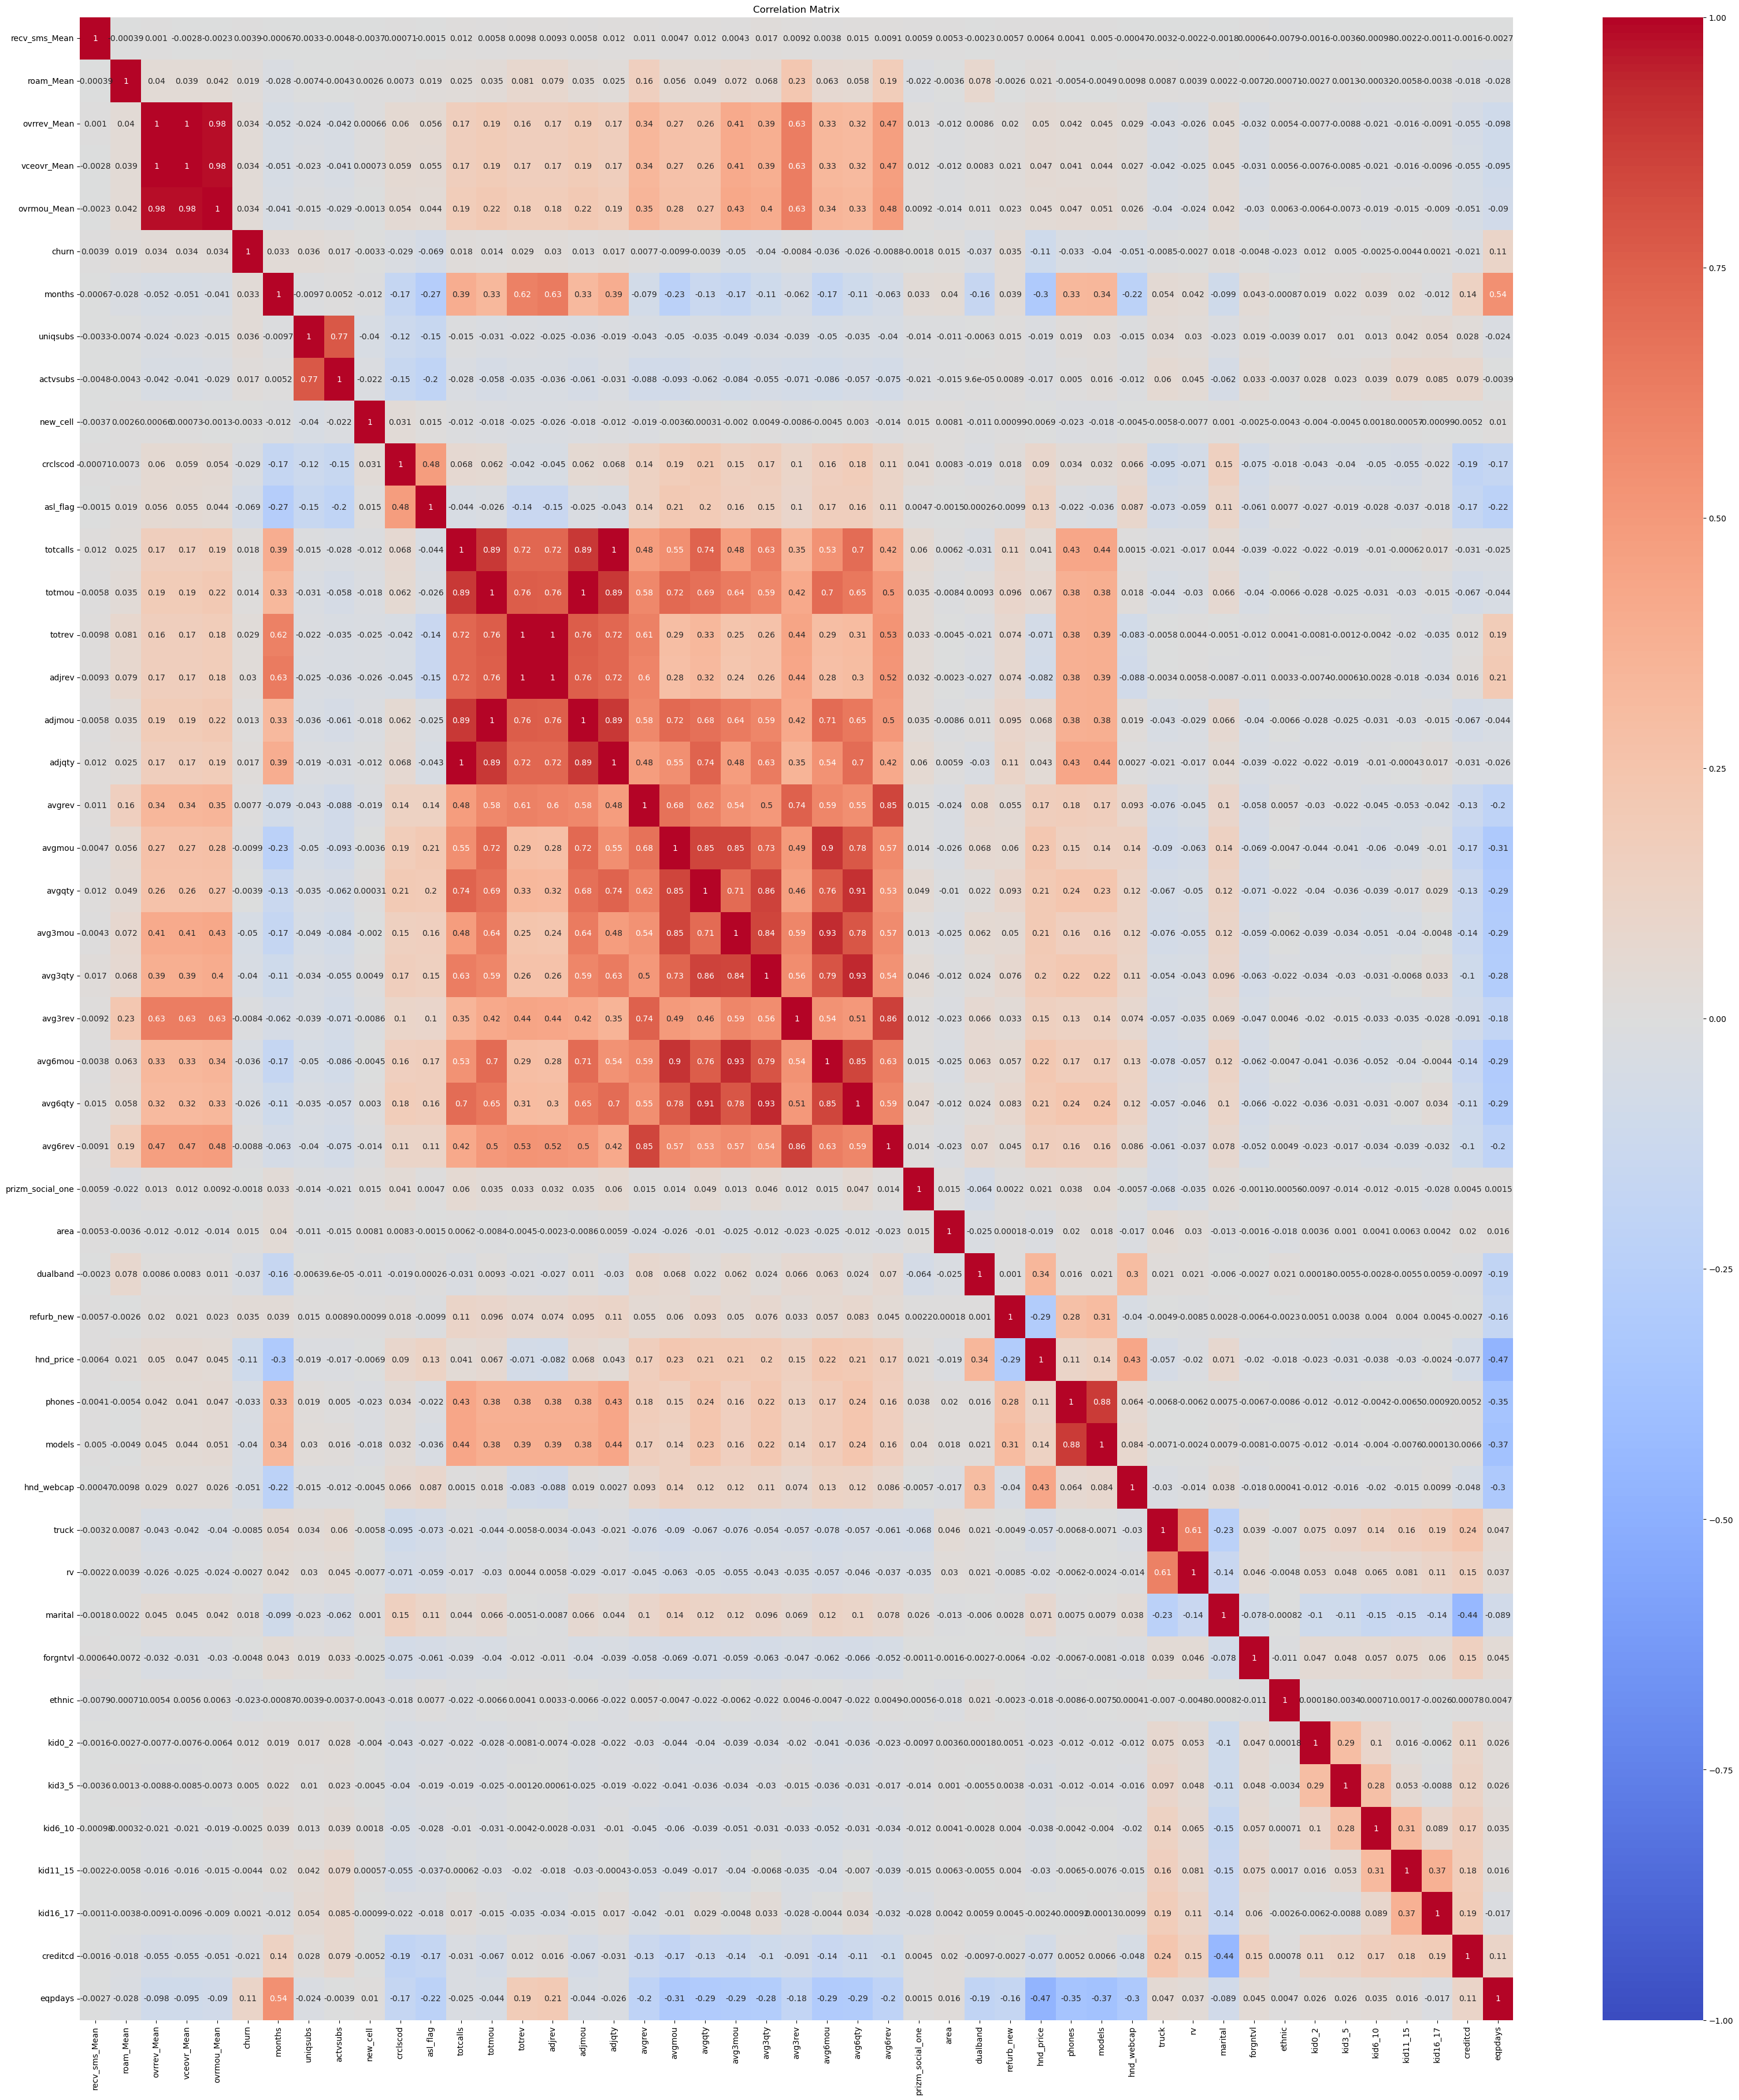

In [52]:
# Remove non-numeric columns for correlation matrix
df = pd.read_csv('processed_dataset.csv')
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df_numeric = df[numeric_cols]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(40, 45))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

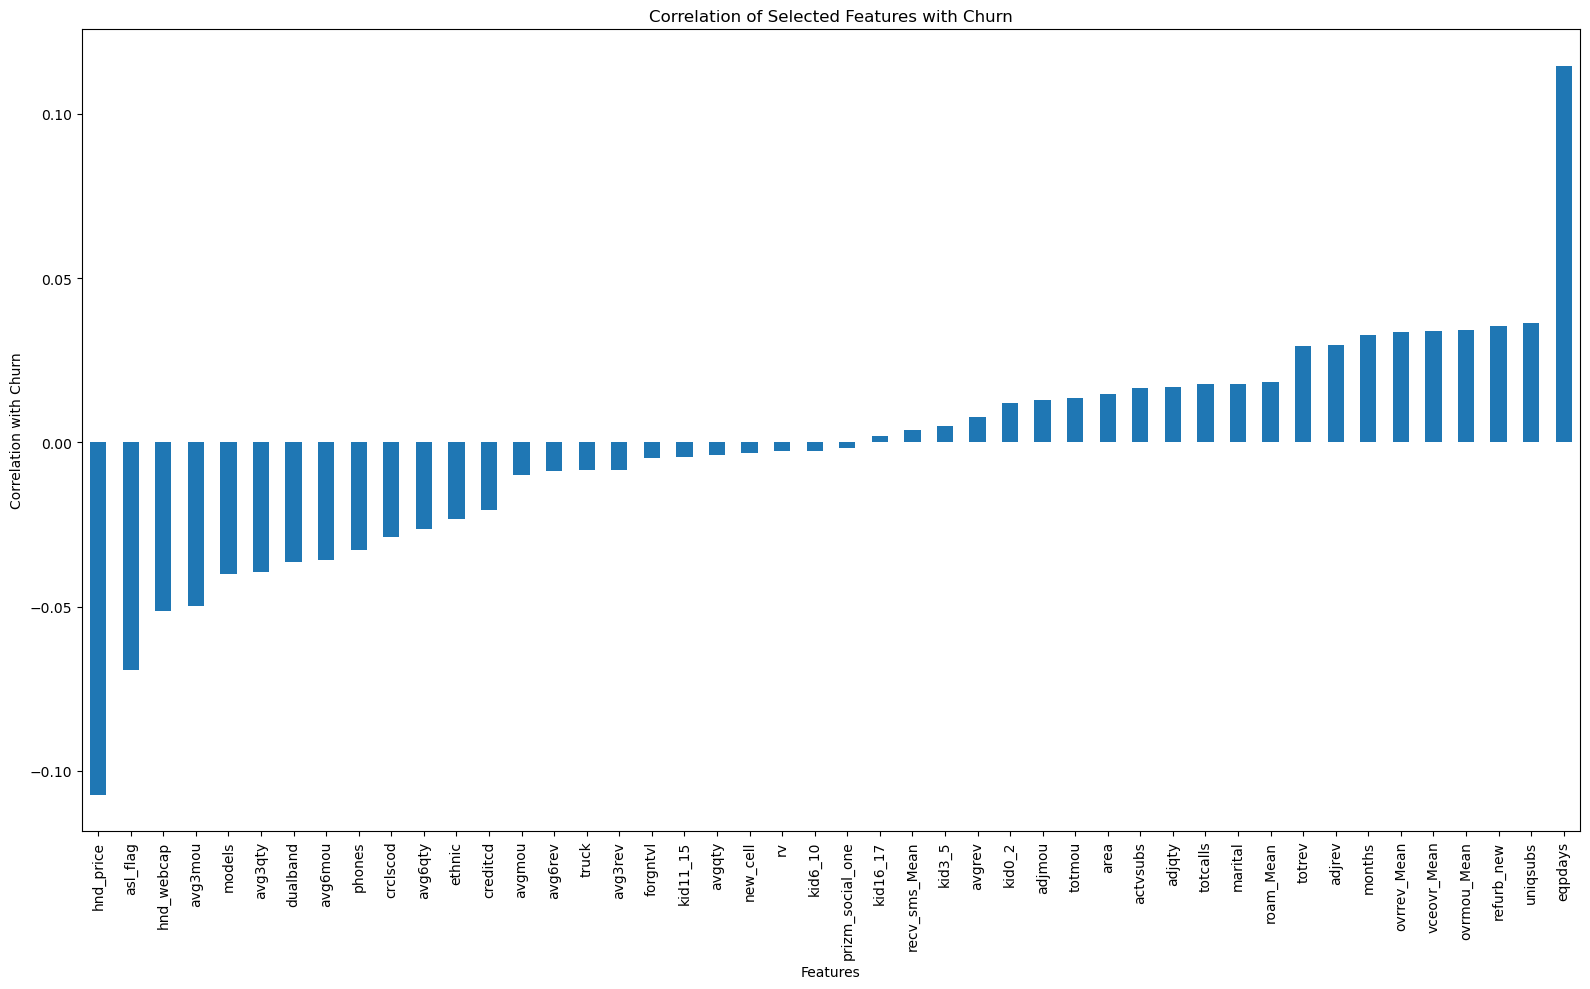

In [53]:
# Load the dataset
df = pd.read_csv('processed_dataset.csv')

# Existing features to keep
features_to_keep = [
    'recv_sms_Mean', 'roam_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'ovrmou_Mean', 'churn',
    'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 
    'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 
    'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 
    'models', 'hnd_webcap', 'truck', 'rv', 'marital', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 
    'kid11_15', 'kid16_17', 'creditcd', 'eqpdays'
]

# Create a new DataFrame with only the specified features
df_selected = df[features_to_keep]

# Calculate correlation with churn
correlations = df_selected.corr()['churn'].drop('churn')

# Sort correlations for better visualization
correlations = correlations.sort_values()

# Plotting the bar graph
plt.figure(figsize=(16, 10))
correlations.plot(kind='bar')
plt.title('Correlation of Selected Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
correlations

hnd_price          -0.107205
asl_flag           -0.069173
hnd_webcap         -0.051285
avg3mou            -0.049873
models             -0.040051
avg3qty            -0.039543
dualband           -0.036544
avg6mou            -0.035895
phones             -0.032846
crclscod           -0.028654
avg6qty            -0.026267
ethnic             -0.023240
creditcd           -0.020539
avgmou             -0.009876
avg6rev            -0.008807
truck              -0.008489
avg3rev            -0.008386
forgntvl           -0.004791
kid11_15           -0.004450
avgqty             -0.003884
new_cell           -0.003285
rv                 -0.002710
kid6_10            -0.002469
prizm_social_one   -0.001826
kid16_17            0.002069
recv_sms_Mean       0.003905
kid3_5              0.004965
avgrev              0.007719
kid0_2              0.011909
adjmou              0.012815
totmou              0.013659
area                0.014624
actvsubs            0.016666
adjqty              0.016953
totcalls      

In [55]:
def count_zeros_and_ones(row):
    zeros = (row['kid0_2'], row['kid3_5'], row['kid6_10'], row['kid11_15'], row['kid16_17']).count(0)
    ones = (row['kid0_2'], row['kid3_5'], row['kid6_10'], row['kid11_15'], row['kid16_17']).count(1)
    return pd.Series([zeros, ones])

# Apply function to each row
df[['total_children_0_U', 'total_children_1_Y']] = df.apply(count_zeros_and_ones, axis=1)
df.drop(columns=['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recv_sms_Mean       90000 non-null  float64
 1   roam_Mean           90000 non-null  float64
 2   ovrrev_Mean         90000 non-null  float64
 3   vceovr_Mean         90000 non-null  float64
 4   ovrmou_Mean         90000 non-null  float64
 5   churn               90000 non-null  int64  
 6   months              90000 non-null  int64  
 7   uniqsubs            90000 non-null  int64  
 8   actvsubs            90000 non-null  int64  
 9   new_cell            90000 non-null  int64  
 10  crclscod            90000 non-null  int64  
 11  asl_flag            90000 non-null  int64  
 12  totcalls            90000 non-null  int64  
 13  totmou              90000 non-null  float64
 14  totrev              90000 non-null  float64
 15  adjrev              90000 non-null  float64
 16  adjm

In [56]:
df.to_csv('proto.csv', index=False)

print("Data saved successfully as 'proto.csv'")

Data saved successfully as 'proto.csv'


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('proto.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recv_sms_Mean       90000 non-null  float64
 1   roam_Mean           90000 non-null  float64
 2   ovrrev_Mean         90000 non-null  float64
 3   vceovr_Mean         90000 non-null  float64
 4   ovrmou_Mean         90000 non-null  float64
 5   churn               90000 non-null  int64  
 6   months              90000 non-null  int64  
 7   uniqsubs            90000 non-null  int64  
 8   actvsubs            90000 non-null  int64  
 9   new_cell            90000 non-null  int64  
 10  crclscod            90000 non-null  int64  
 11  asl_flag            90000 non-null  int64  
 12  totcalls            90000 non-null  int64  
 13  totmou              90000 non-null  float64
 14  totrev              90000 non-null  float64
 15  adjrev              90000 non-null  float64
 16  adjm

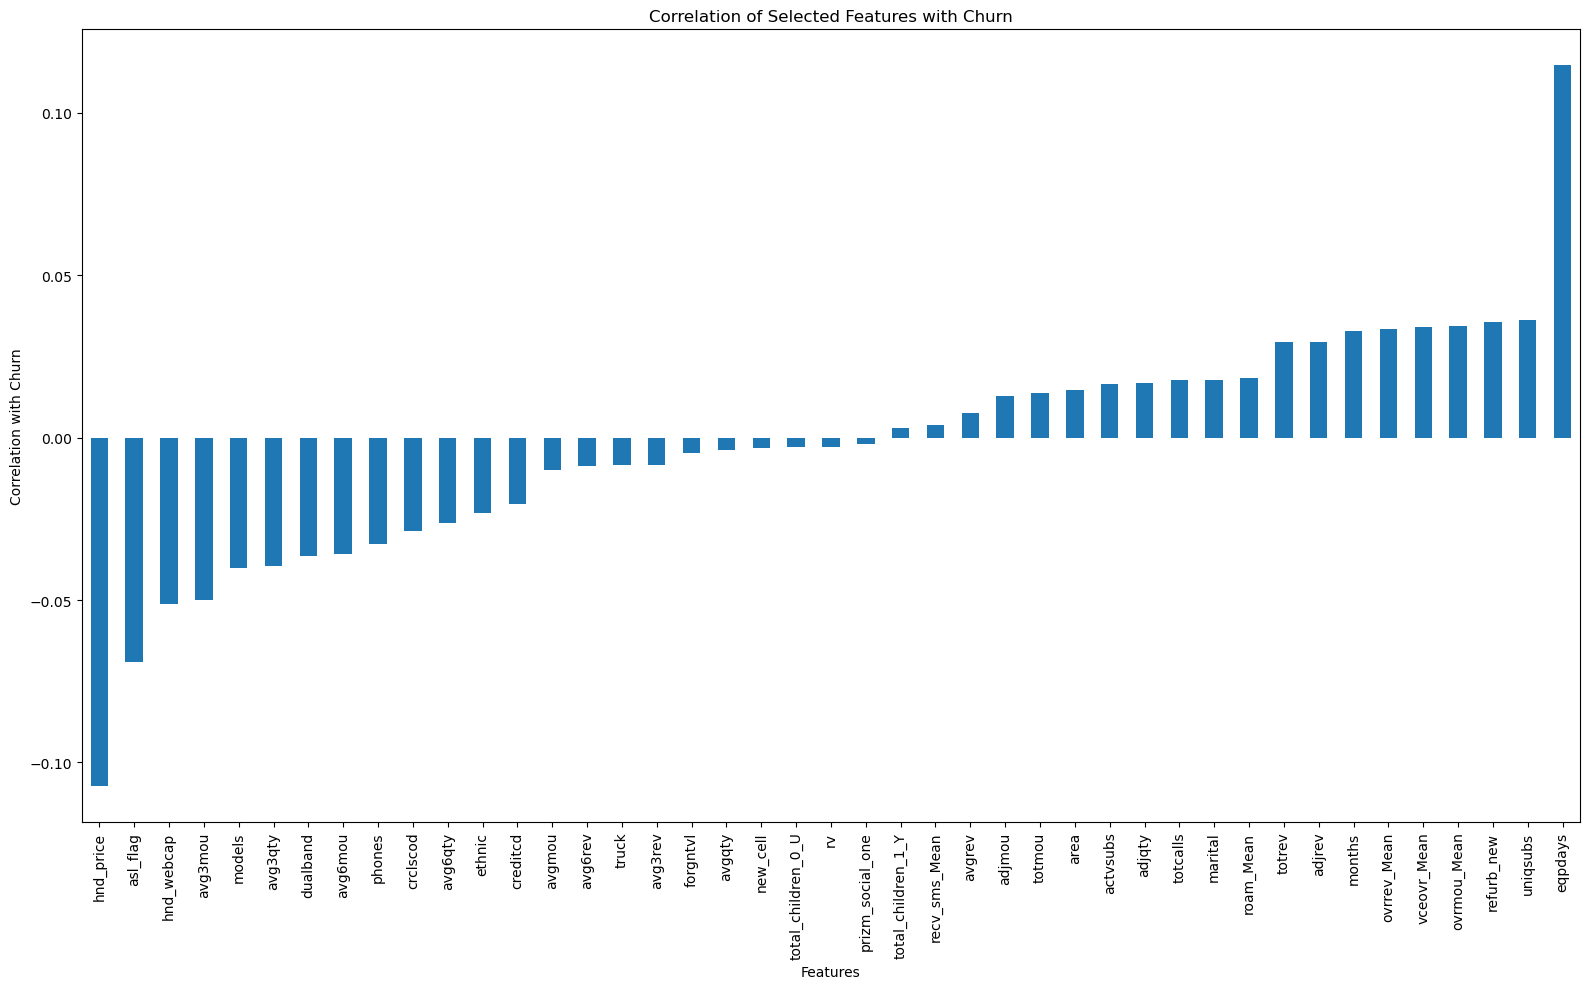

In [58]:
# Existing features to keep
features_to_keep = [
    'recv_sms_Mean', 'roam_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'ovrmou_Mean', 'churn',
    'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 
    'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 
    'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 
    'models', 'hnd_webcap', 'truck', 'rv', 'marital', 'forgntvl', 'ethnic', 'total_children_0_U','total_children_1_Y', 'creditcd', 'eqpdays'
]

# Create a new DataFrame with only the specified features
df_selected = df[features_to_keep]

# Calculate correlation with churn
correlations = df_selected.corr()['churn'].drop('churn')

# Sort correlations for better visualization
correlations = correlations.sort_values()

# Plotting the bar graph
plt.figure(figsize=(16, 10))
correlations.plot(kind='bar')
plt.title('Correlation of Selected Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
df['total_truck'] = df['truck'] + df['rv']
features_to_drop = ['truck','rv']
df = df.drop(columns=features_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recv_sms_Mean       90000 non-null  float64
 1   roam_Mean           90000 non-null  float64
 2   ovrrev_Mean         90000 non-null  float64
 3   vceovr_Mean         90000 non-null  float64
 4   ovrmou_Mean         90000 non-null  float64
 5   churn               90000 non-null  int64  
 6   months              90000 non-null  int64  
 7   uniqsubs            90000 non-null  int64  
 8   actvsubs            90000 non-null  int64  
 9   new_cell            90000 non-null  int64  
 10  crclscod            90000 non-null  int64  
 11  asl_flag            90000 non-null  int64  
 12  totcalls            90000 non-null  int64  
 13  totmou              90000 non-null  float64
 14  totrev              90000 non-null  float64
 15  adjrev              90000 non-null  float64
 16  adjm

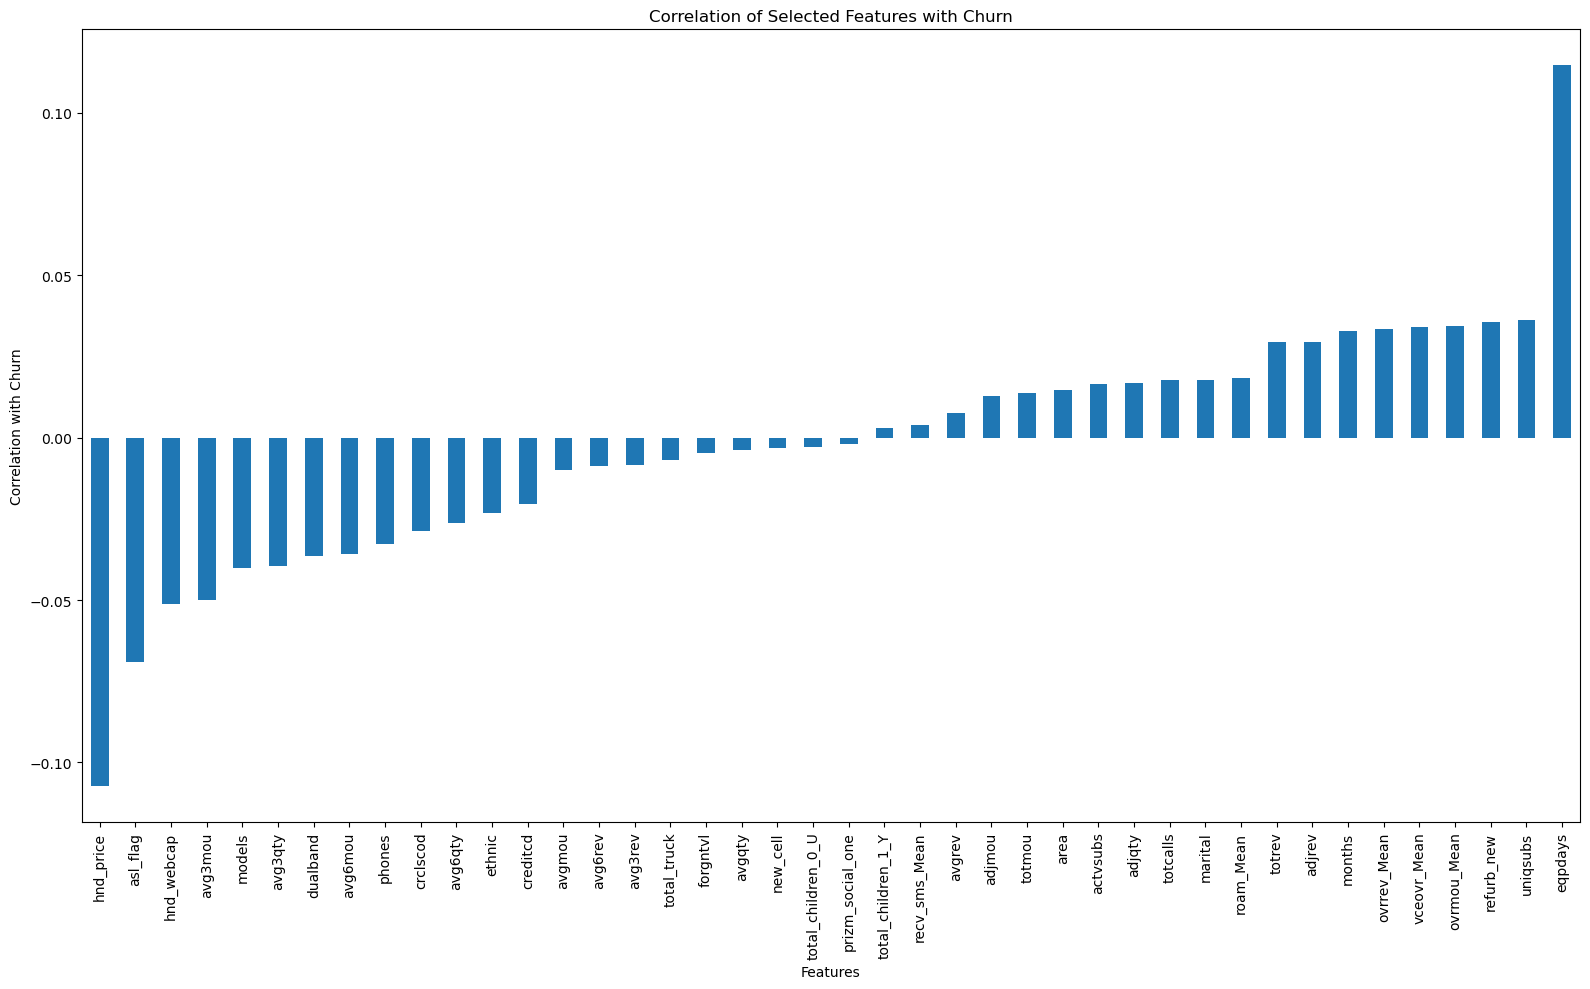

In [60]:
# Existing features to keep
features_to_keep = [
    'recv_sms_Mean', 'roam_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'ovrmou_Mean', 'churn',
    'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 
    'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 
    'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 
    'models', 'hnd_webcap', 'marital', 'forgntvl', 'ethnic', 'total_children_0_U','total_children_1_Y', 'creditcd', 'eqpdays','total_truck'
]

# Create a new DataFrame with only the specified features
df_selected = df[features_to_keep]

# Calculate correlation with churn
correlations = df_selected.corr()['churn'].drop('churn')

# Sort correlations for better visualization
correlations = correlations.sort_values()

# Plotting the bar graph
plt.figure(figsize=(16, 10))
correlations.plot(kind='bar')
plt.title('Correlation of Selected Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

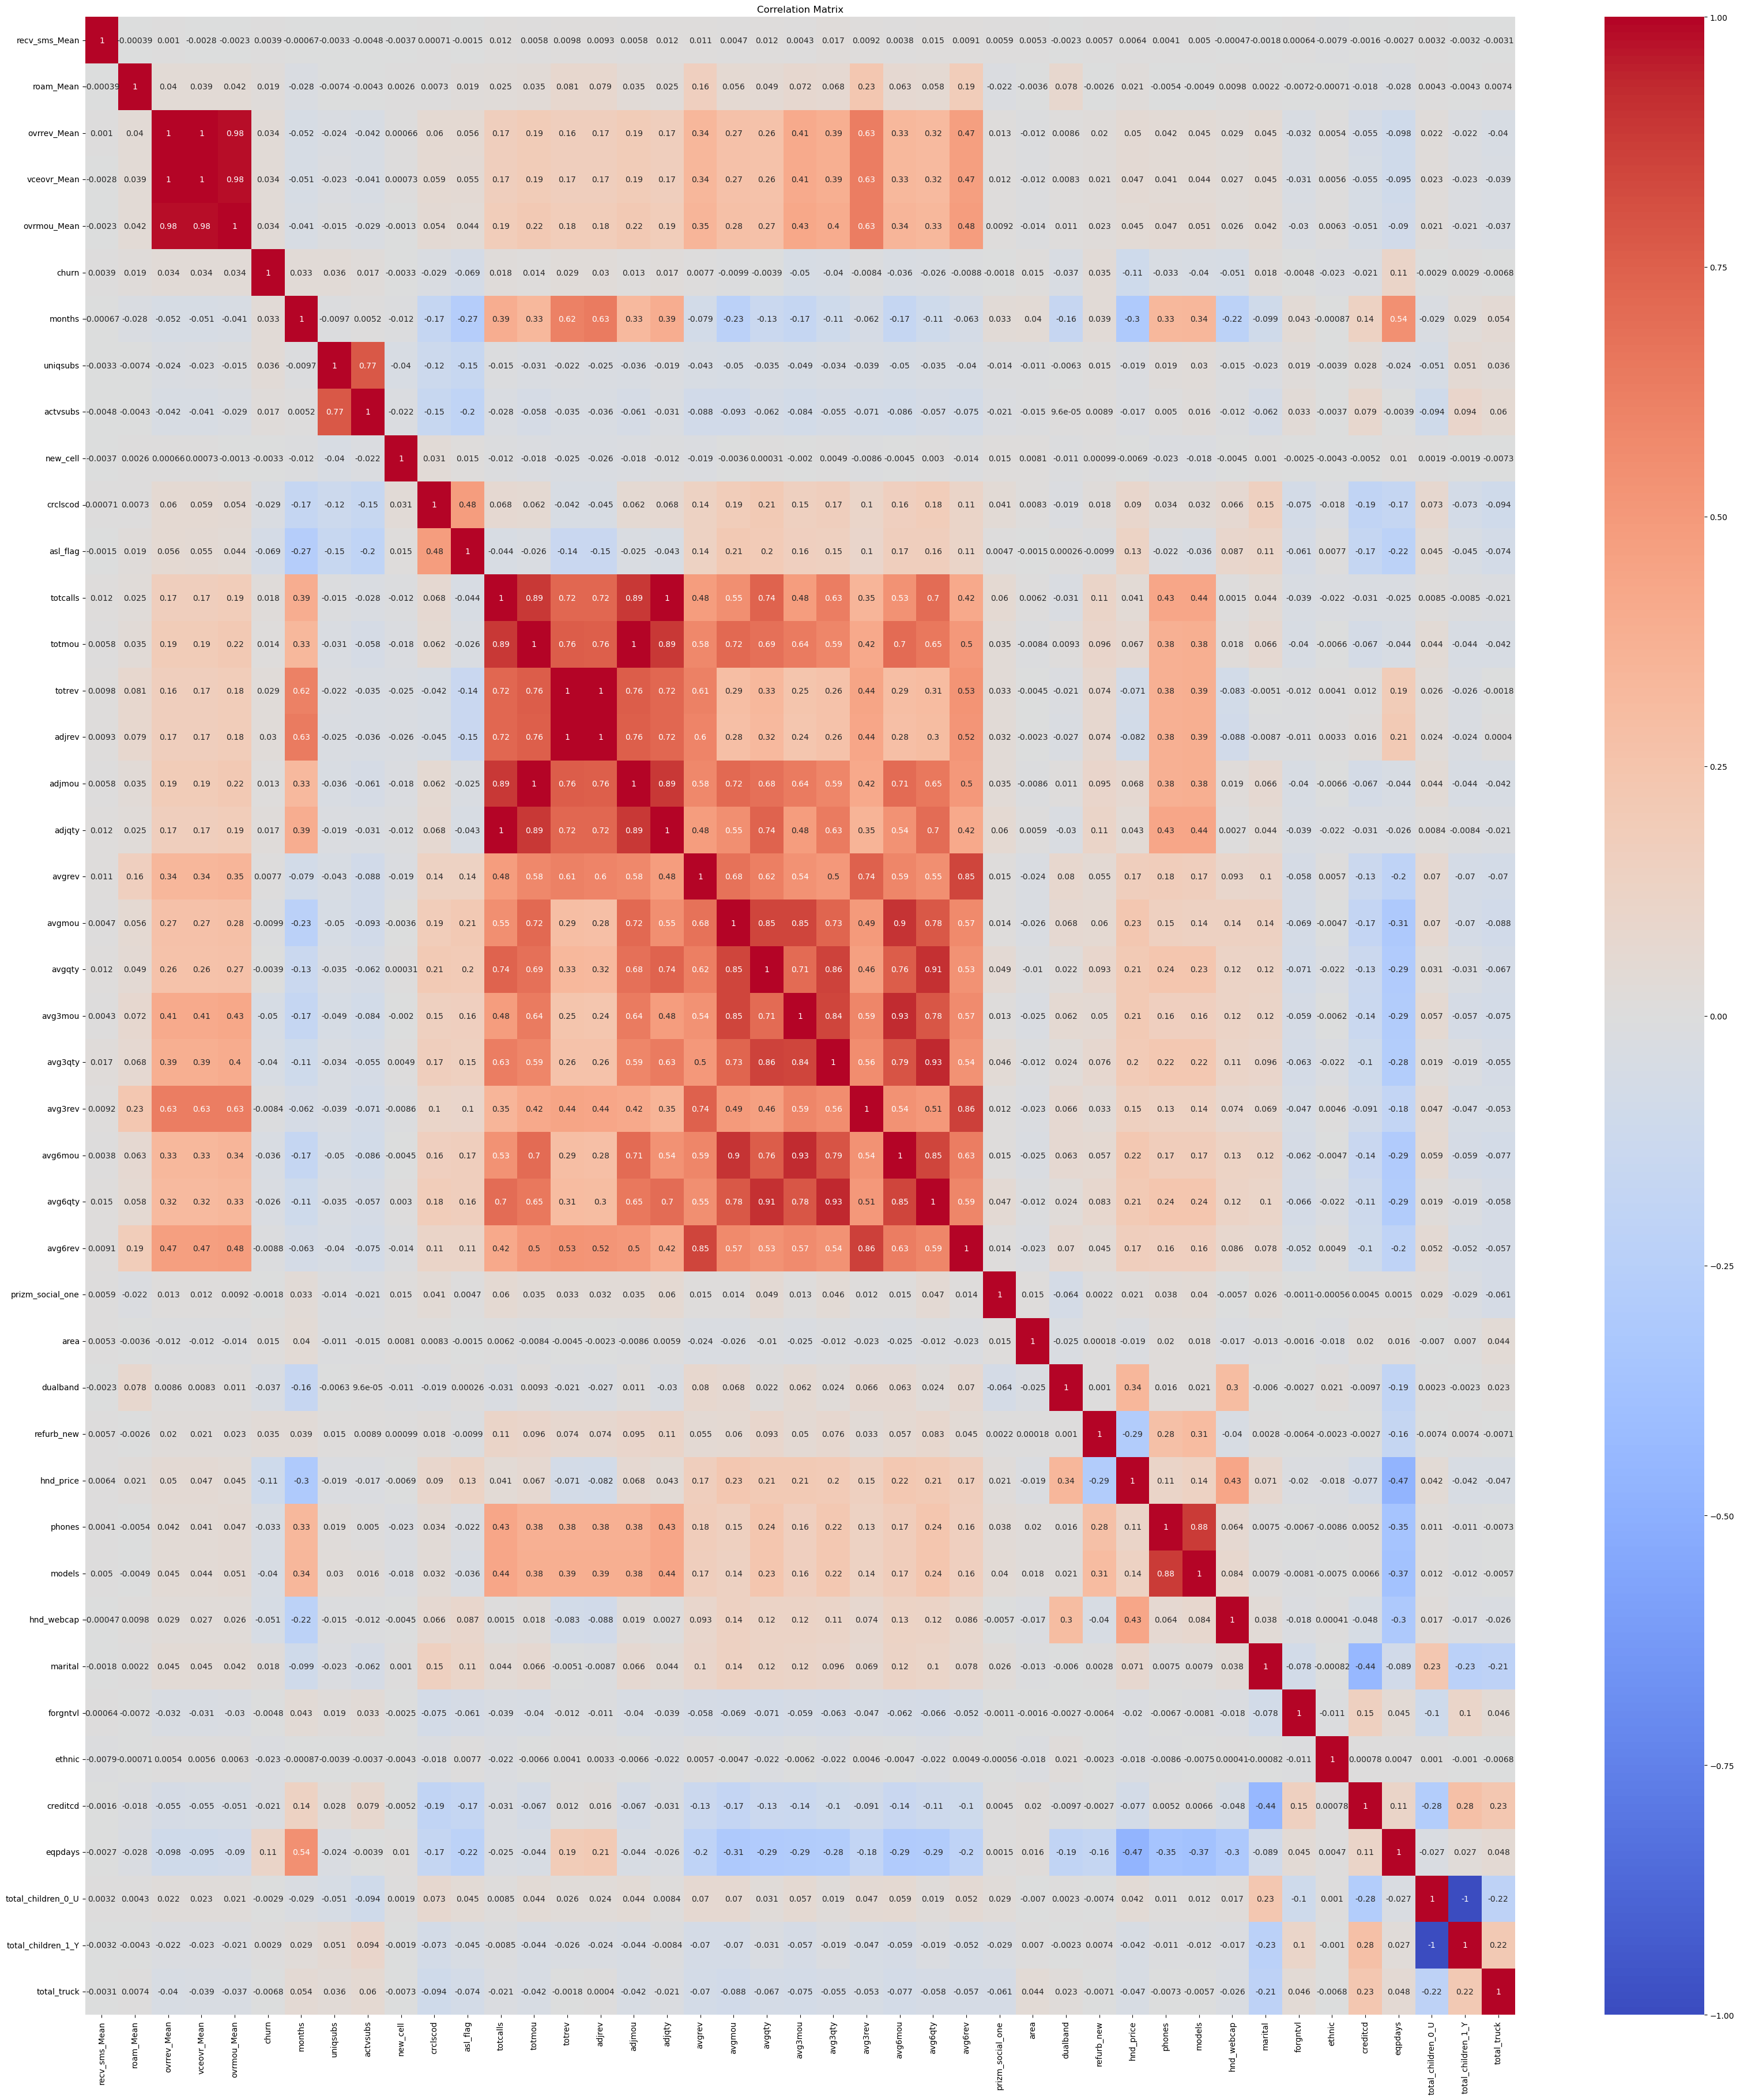

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df_numeric = df[numeric_cols]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(40, 45))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Aggregating usage metrics
df['total_adj_usage'] = df['adjmou']
df['total_adj_calls'] = df['adjqty']
df['total_adj_revenue'] = df['adjrev']
df['avg_monthly_usage'] = df[['avg3mou', 'avg6mou']].mean(axis=1)
df['avg_monthly_calls'] = df[['avg3qty', 'avg6qty']].mean(axis=1)
df['avg_monthly_revenue'] = df[['avg3rev', 'avg6rev']].mean(axis=1)
features_to_drop = ['adjmou','adjqty','adjrev','avg3mou', 'avg6mou','avg3qty', 'avg6qty','avg3rev', 'avg6rev']
df = df.drop(columns=features_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recv_sms_Mean        90000 non-null  float64
 1   roam_Mean            90000 non-null  float64
 2   ovrrev_Mean          90000 non-null  float64
 3   vceovr_Mean          90000 non-null  float64
 4   ovrmou_Mean          90000 non-null  float64
 5   churn                90000 non-null  int64  
 6   months               90000 non-null  int64  
 7   uniqsubs             90000 non-null  int64  
 8   actvsubs             90000 non-null  int64  
 9   new_cell             90000 non-null  int64  
 10  crclscod             90000 non-null  int64  
 11  asl_flag             90000 non-null  int64  
 12  totcalls             90000 non-null  int64  
 13  totmou               90000 non-null  float64
 14  totrev               90000 non-null  float64
 15  avgrev               90000 non-null 

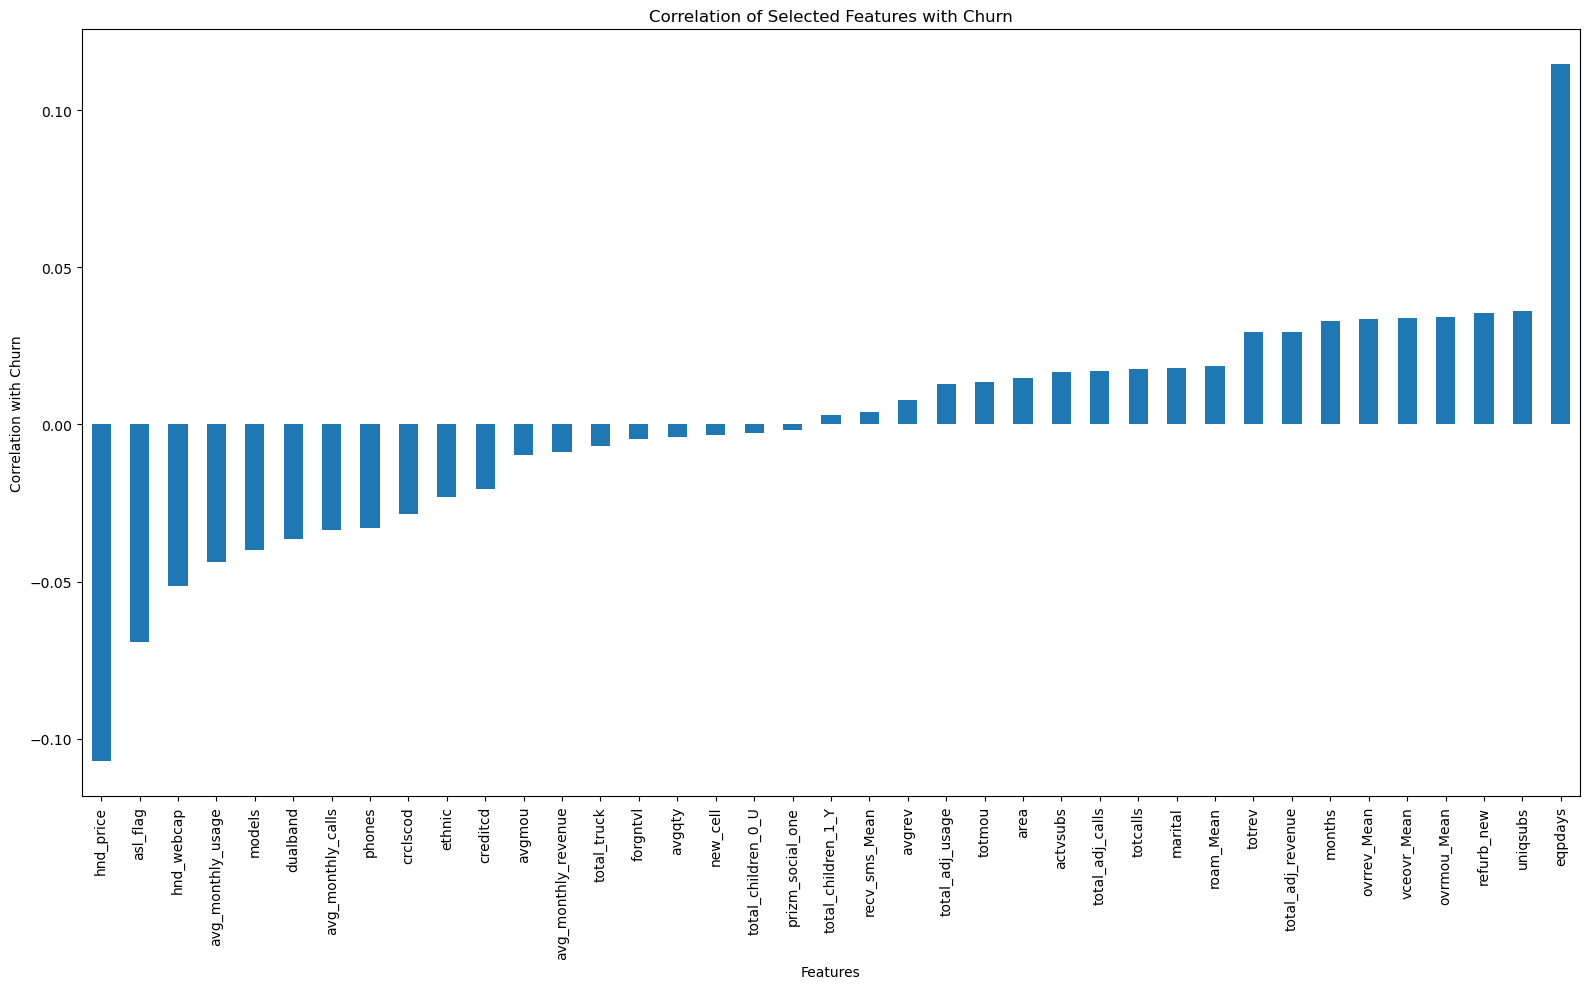

In [63]:
# Existing features to keep
features_to_keep = [
    'recv_sms_Mean', 'roam_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'ovrmou_Mean', 'churn',
    'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 'avgrev', 'avgmou', 'avgqty', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 
    'models', 'hnd_webcap', 'marital', 'forgntvl', 'ethnic', 'total_children_0_U','total_children_1_Y', 'creditcd', 'eqpdays','total_truck',
    'total_adj_usage','total_adj_calls','total_adj_revenue','avg_monthly_usage','avg_monthly_calls','avg_monthly_revenue'
]

# Create a new DataFrame with only the specified features
df_selected = df[features_to_keep]

# Calculate correlation with churn
correlations = df_selected.corr()['churn'].drop('churn')

# Sort correlations for better visualization
correlations = correlations.sort_values()

# Plotting the bar graph
plt.figure(figsize=(16, 10))
correlations.plot(kind='bar')
plt.title('Correlation of Selected Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [64]:
features_to_drop = ['recv_sms_Mean','asl_flag']
df = df.drop(columns=features_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   roam_Mean            90000 non-null  float64
 1   ovrrev_Mean          90000 non-null  float64
 2   vceovr_Mean          90000 non-null  float64
 3   ovrmou_Mean          90000 non-null  float64
 4   churn                90000 non-null  int64  
 5   months               90000 non-null  int64  
 6   uniqsubs             90000 non-null  int64  
 7   actvsubs             90000 non-null  int64  
 8   new_cell             90000 non-null  int64  
 9   crclscod             90000 non-null  int64  
 10  totcalls             90000 non-null  int64  
 11  totmou               90000 non-null  float64
 12  totrev               90000 non-null  float64
 13  avgrev               90000 non-null  float64
 14  avgmou               90000 non-null  float64
 15  avgqty               90000 non-null 

In [65]:
# Round off the 'hnd_price' column to the nearest integer but retain float64 type
df['hnd_price'] = df['hnd_price'].round().astype('float64')

In [66]:
df.to_csv('122.csv', index=False)

print("Data saved successfully as '122.csv'")

Data saved successfully as '122.csv'


# Model building

Training set has 72000 samples.
Class distribution in training set: 
0    0.502139
1    0.497861
Name: churn, dtype: float64
Training Logistic Regression with GridSearchCV...
Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'liblinear'}

Evaluation metrics for Logistic Regression:
Accuracy: 0.5854
ROC AUC: 0.5856
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      8900
           1       0.59      0.57      0.58      9100

    accuracy                           0.59     18000
   macro avg       0.59      0.59      0.59     18000
weighted avg       0.59      0.59      0.59     18000



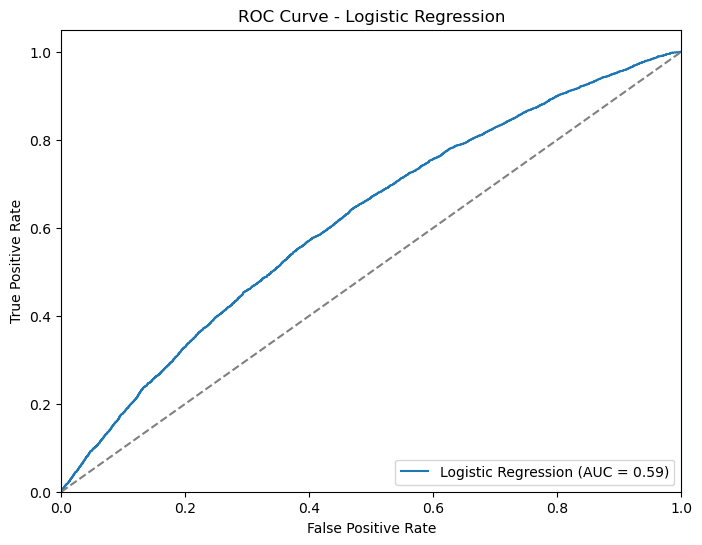

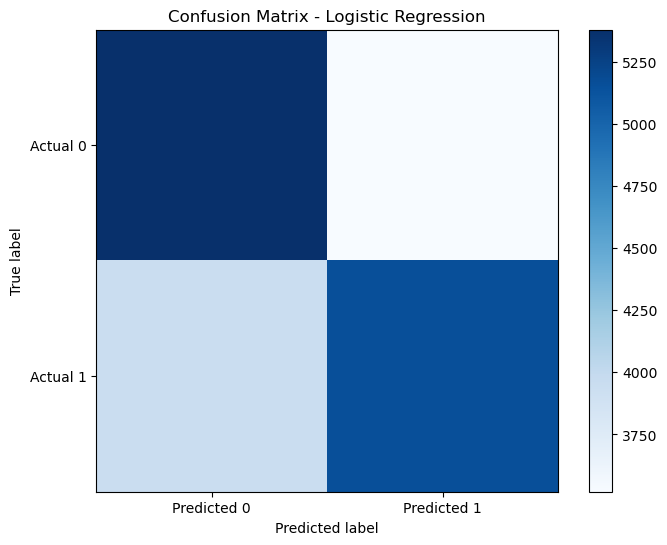

Training Decision Tree with GridSearchCV...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}

Evaluation metrics for Decision Tree:
Accuracy: 0.5964
ROC AUC: 0.5955
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      8900
           1       0.59      0.68      0.63      9100

    accuracy                           0.60     18000
   macro avg       0.60      0.60      0.59     18000
weighted avg       0.60      0.60      0.59     18000



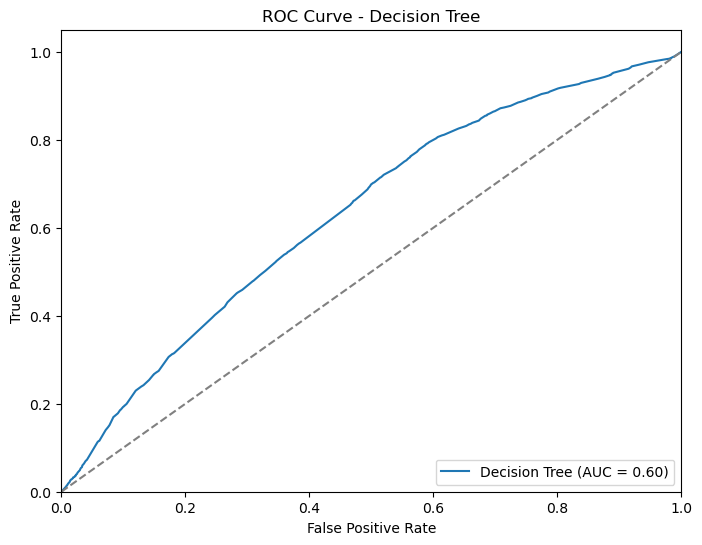

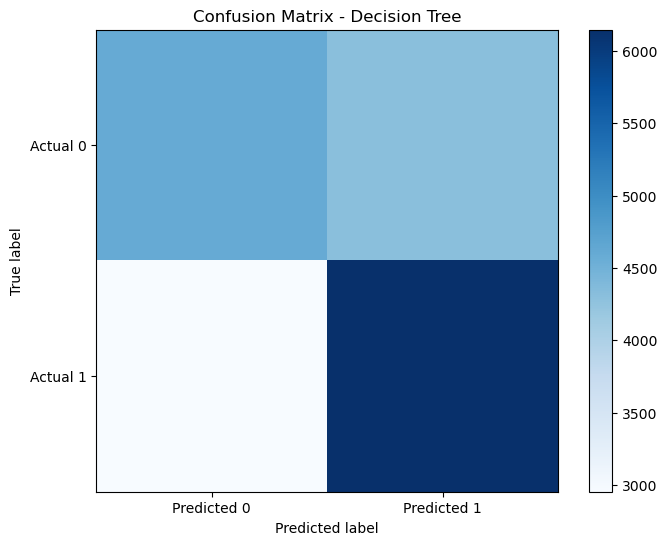

Training Random Forest with GridSearchCV...
Best parameters for Random Forest: {'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}

Evaluation metrics for Random Forest:
Accuracy: 0.6179
ROC AUC: 0.6174
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      8900
           1       0.61      0.67      0.64      9100

    accuracy                           0.62     18000
   macro avg       0.62      0.62      0.62     18000
weighted avg       0.62      0.62      0.62     18000



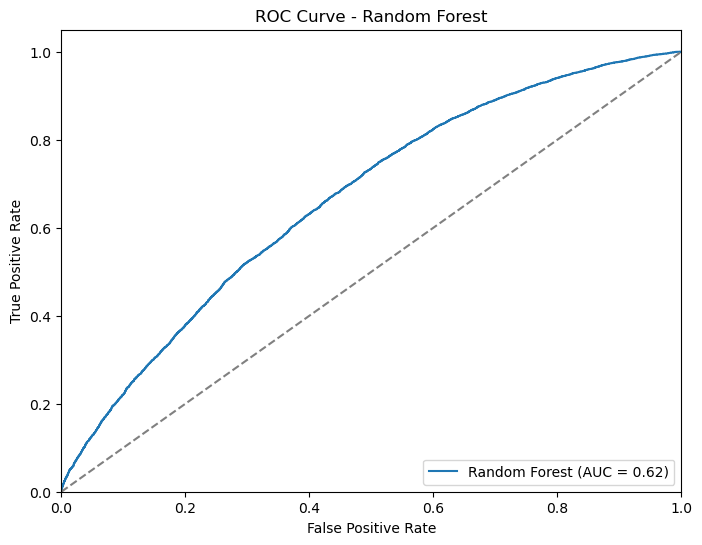

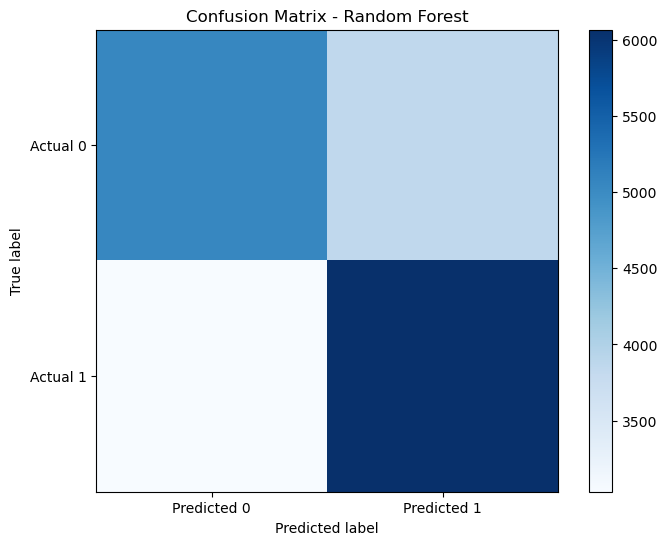

Training Gradient Boosting with GridSearchCV...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Evaluation metrics for Gradient Boosting:
Accuracy: 0.6266
ROC AUC: 0.6262
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      8900
           1       0.62      0.66      0.64      9100

    accuracy                           0.63     18000
   macro avg       0.63      0.63      0.63     18000
weighted avg       0.63      0.63      0.63     18000



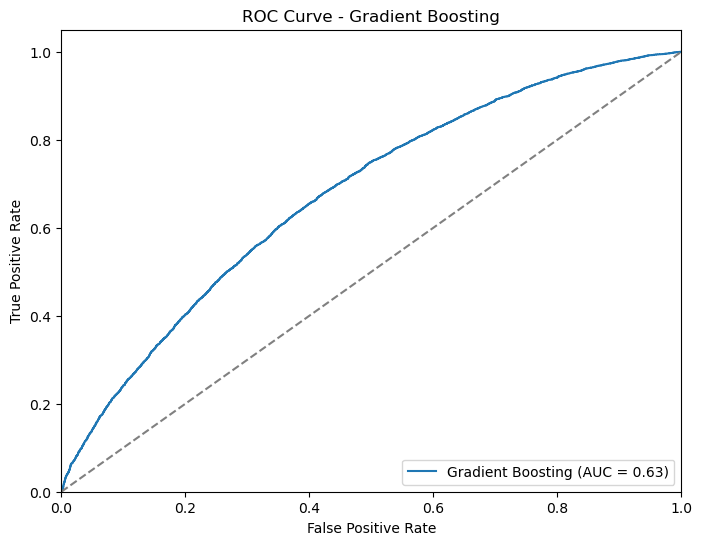

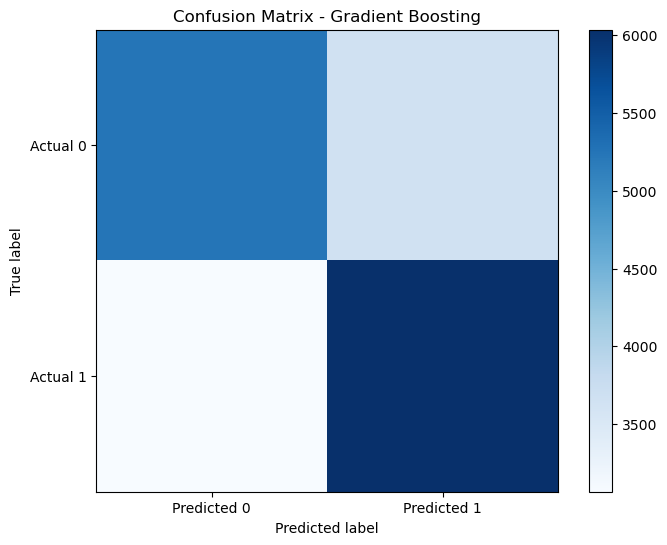

Training XGBoost with GridSearchCV...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Evaluation metrics for XGBoost:
Accuracy: 0.6285
ROC AUC: 0.6281
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      8900
           1       0.62      0.67      0.64      9100

    accuracy                           0.63     18000
   macro avg       0.63      0.63      0.63     18000
weighted avg       0.63      0.63      0.63     18000



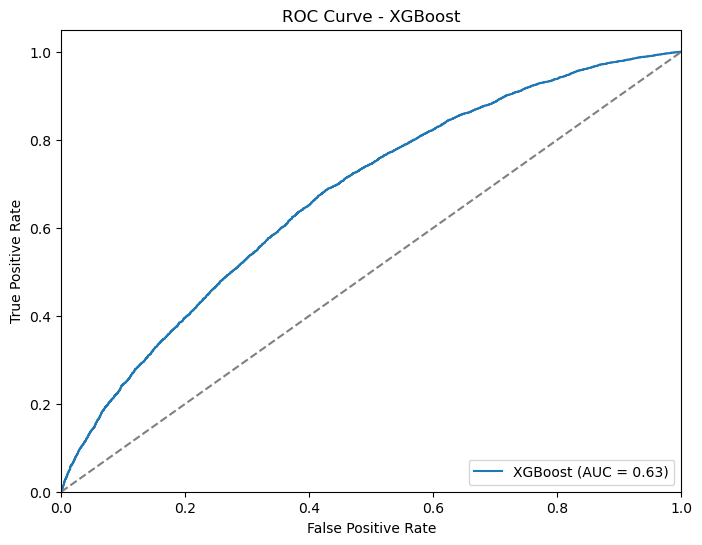

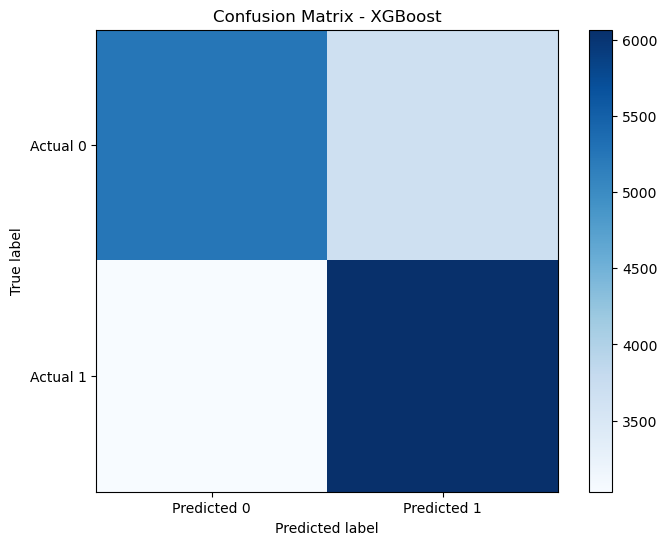


Best model 'XGBoost' saved successfully.


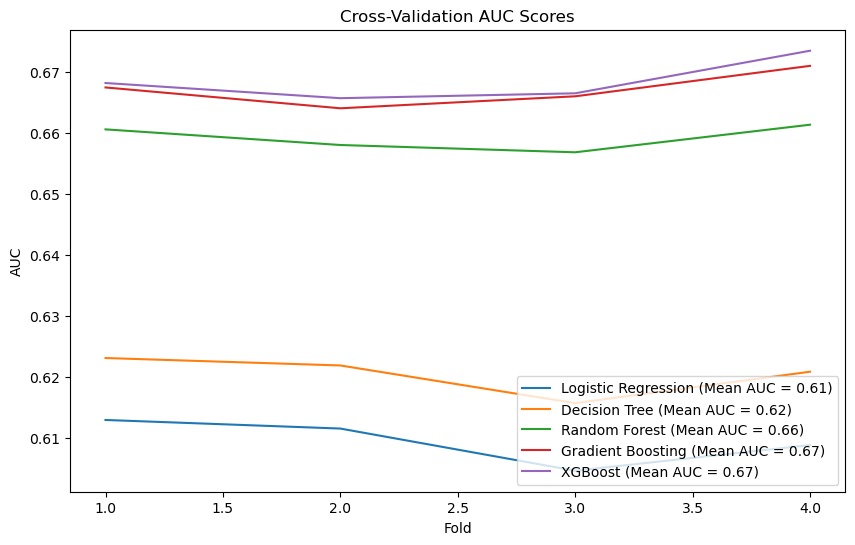


Best model based on cross-validation: XGBoost (Mean AUC = 0.67)
Worst model based on cross-validation: Logistic Regression (Mean AUC = 0.61)


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from xgboost import XGBClassifier
import joblib
import numpy as np

# Load selected features data
df = pd.read_csv('122.csv')

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Check condition: Ensure the training set has enough samples and is not too imbalanced
min_samples = 55
imbalance_threshold = 0.81

if len(X_train) >= min_samples and (y_train.value_counts(normalize=True).max() <= imbalance_threshold):
    print(f"Training set has {len(X_train)} samples.")
    print(f"Class distribution in training set: \n{y_train.value_counts(normalize=True)}")
    
    # Standardize numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define parameter grids for hyperparameter tuning
    param_grids = {
        'Logistic Regression': {
            'C': [1.0],
            'solver': ['liblinear']
        },
        'Decision Tree': {
            'max_depth': [10],
            'min_samples_split': [20],
            'min_samples_leaf': [5]
        },
        'Random Forest': {
            'n_estimators': [200],
            'max_features': ['auto'],
            'min_samples_split': [2],
            'min_samples_leaf': [10]
        },
        'Gradient Boosting': {
            'n_estimators': [200],
            'learning_rate': [0.1],
            'max_depth': [5]
        },
        'XGBoost': {
            'n_estimators': [200],
            'learning_rate': [0.1],
            'max_depth': [5]
        }
    }

    models = {
        'Logistic Regression': LogisticRegression(random_state=36),
        'Decision Tree': DecisionTreeClassifier(random_state=36),
        'Random Forest': RandomForestClassifier(random_state=36),
        'Gradient Boosting': GradientBoostingClassifier(random_state=36),
        'XGBoost': XGBClassifier(random_state=36)
    }

    best_model_name = None
    best_roc_auc = -1
    best_model = None

    # For storing cross-validation results
    cv_results = {}

    # Train and evaluate models
    for model_name, model in models.items():
        print(f"Training {model_name} with GridSearchCV...")
        
        # Perform GridSearchCV for hyperparameter tuning
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        print(f"Best parameters for {model_name}: {best_params}")

        # Perform cross-validation with the best parameters
        kfold = KFold(n_splits=4, shuffle=True, random_state=36)
        cv_scores = cross_val_score(best_model_cv, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')
        cv_results[model_name] = cv_scores
        
        # Train the model on the full training data
        best_model_cv.fit(X_train_scaled, y_train)
        y_pred = best_model_cv.predict(X_test_scaled)
        
        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Print evaluation metrics
        print(f"\nEvaluation metrics for {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"Classification Report:\n{report}")
        
        # Save the best model based on ROC AUC
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_model_name = model_name
            best_model = best_model_cv
            best_y_test = y_test
            best_y_pred = y_pred
        
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, best_model_cv.predict_proba(X_test_scaled)[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.colorbar()
        plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
        plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

    # Save the best model to disk using joblib
    if best_model_name:
        joblib.dump(best_model, f'best_model_{best_model_name}.joblib')
        print(f"\nBest model '{best_model_name}' saved successfully.")

    # Plot cross-validation results
    plt.figure(figsize=(10, 6))
    for model_name, cv_scores in cv_results.items():
        plt.plot(np.arange(1, len(cv_scores) + 1), cv_scores, label=f'{model_name} (Mean AUC = {np.mean(cv_scores):.2f})')
    plt.xlabel('Fold')
    plt.ylabel('AUC')
    plt.title('Cross-Validation AUC Scores')
    plt.legend(loc='lower right')
    plt.show()
    
    # Determine the best and worst cross-validation results
    mean_cv_scores = {model_name: np.mean(scores) for model_name, scores in cv_results.items()}
    best_cv_model_name = max(mean_cv_scores, key=mean_cv_scores.get)
    worst_cv_model_name = min(mean_cv_scores, key=mean_cv_scores.get)

    print(f"\nBest model based on cross-validation: {best_cv_model_name} (Mean AUC = {mean_cv_scores[best_cv_model_name]:.2f})")
    print(f"Worst model based on cross-validation: {worst_cv_model_name} (Mean AUC = {mean_cv_scores[worst_cv_model_name]:.2f})")

else:
    print("The training set does not meet the required conditions of minimum samples or class balance.")


Training Gradient Boosting with RandomizedSearchCV...
Best parameters for Gradient Boosting: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

Evaluation metrics for Gradient Boosting:
Training Accuracy: 0.6798
Test Accuracy: 0.6248
ROC AUC: 0.6243
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61      8900
           1       0.62      0.67      0.64      9100

    accuracy                           0.62     18000
   macro avg       0.63      0.62      0.62     18000
weighted avg       0.63      0.62      0.62     18000



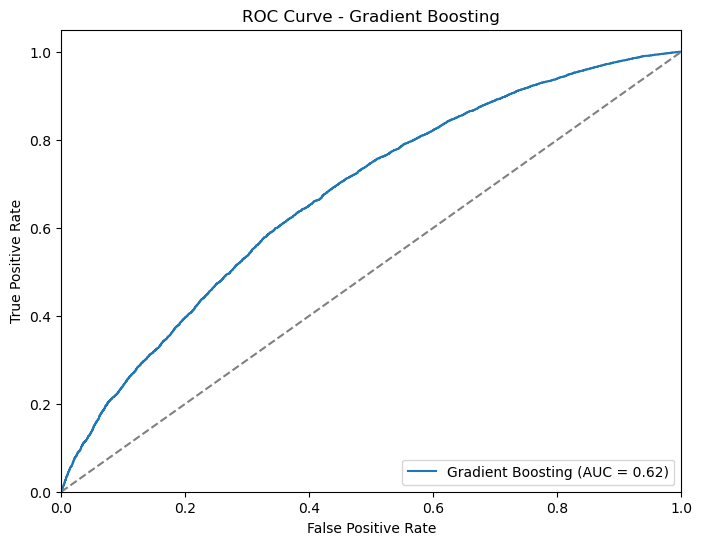

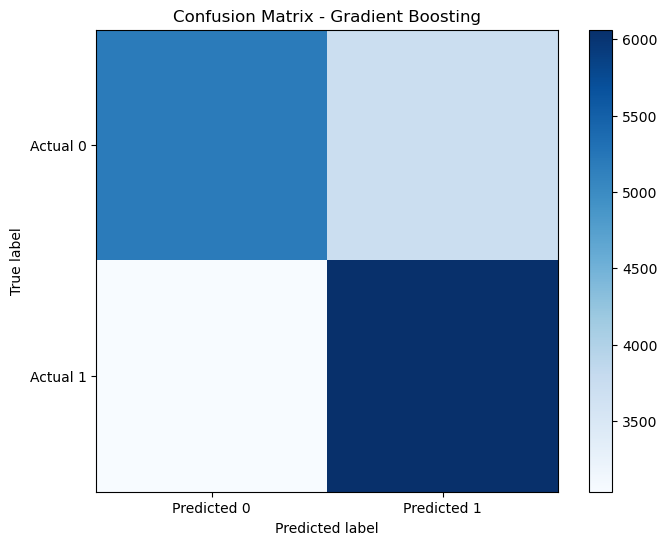

Training XGBoost with RandomizedSearchCV...
Best parameters for XGBoost: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

Evaluation metrics for XGBoost:
Training Accuracy: 0.6741
Test Accuracy: 0.6255
ROC AUC: 0.6250
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61      8900
           1       0.62      0.67      0.64      9100

    accuracy                           0.63     18000
   macro avg       0.63      0.63      0.62     18000
weighted avg       0.63      0.63      0.62     18000



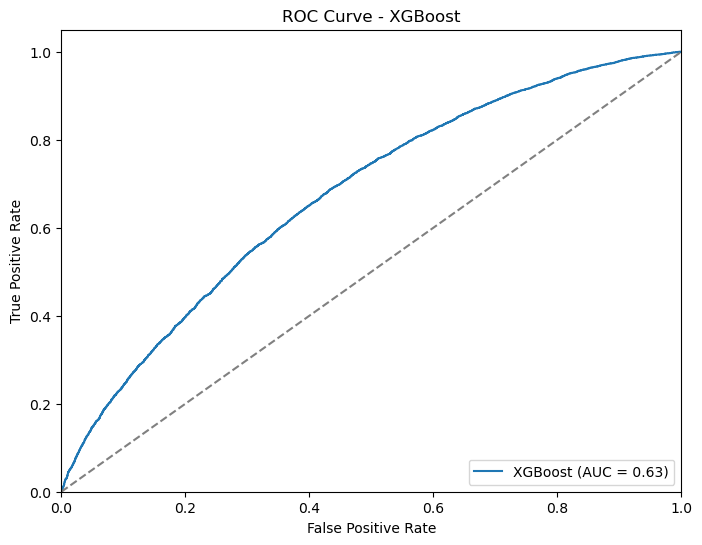

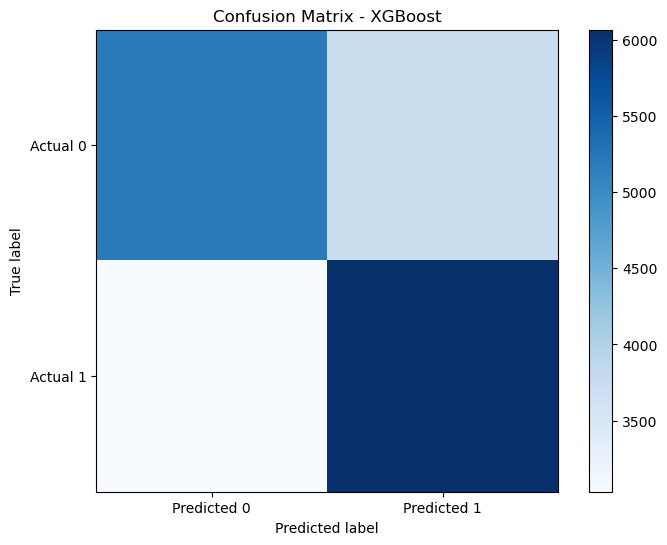

Training LightGBM with RandomizedSearchCV...
[LightGBM] [Info] Number of positive: 27116, number of negative: 27115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4860
[LightGBM] [Info] Number of data points in the train set: 54231, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000037
[LightGBM] [Info] Start training from score 0.000037
[LightGBM] [Info] Number of positive: 27116, number of negative: 27115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4855
[LightGBM] [Info] Number of data points in the train set: 54231, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScor

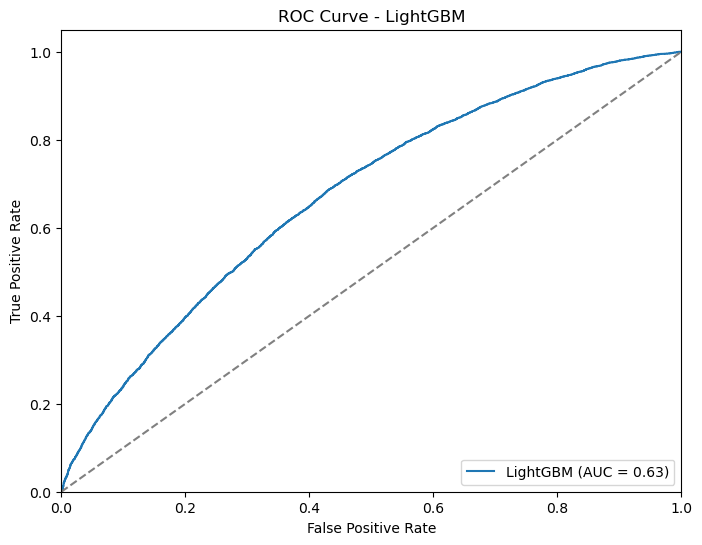

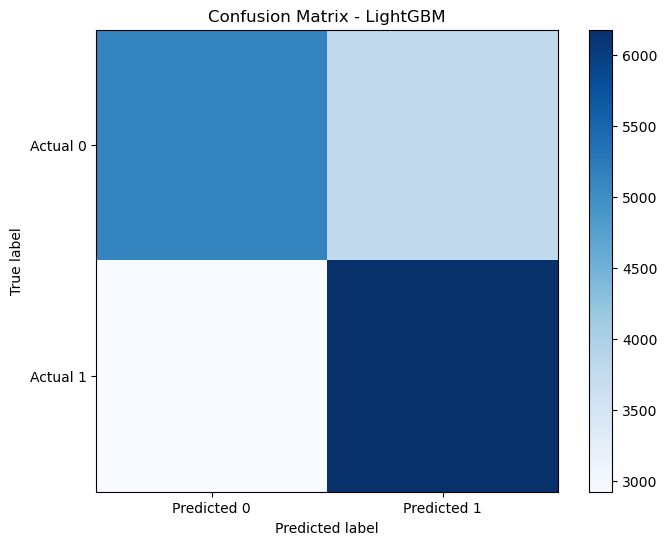

Training AdaBoost with RandomizedSearchCV...
Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1}

Evaluation metrics for AdaBoost:
Training Accuracy: 0.5923
Test Accuracy: 0.5947
ROC AUC: 0.5934
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.47      0.54      8900
           1       0.58      0.71      0.64      9100

    accuracy                           0.59     18000
   macro avg       0.60      0.59      0.59     18000
weighted avg       0.60      0.59      0.59     18000



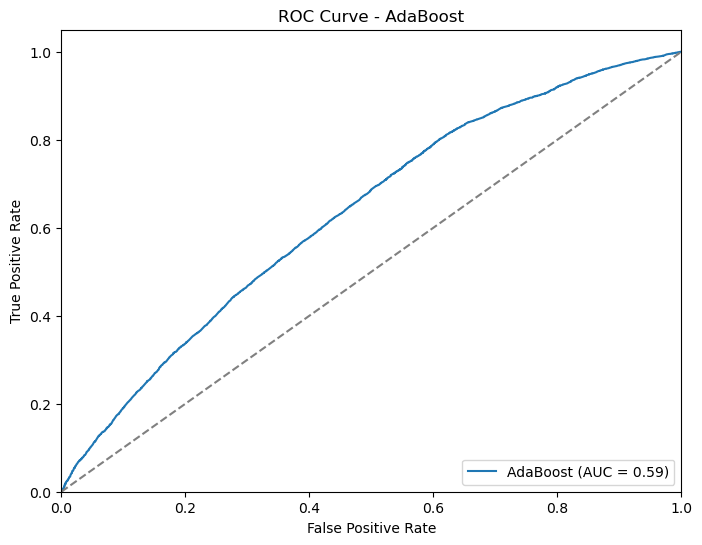

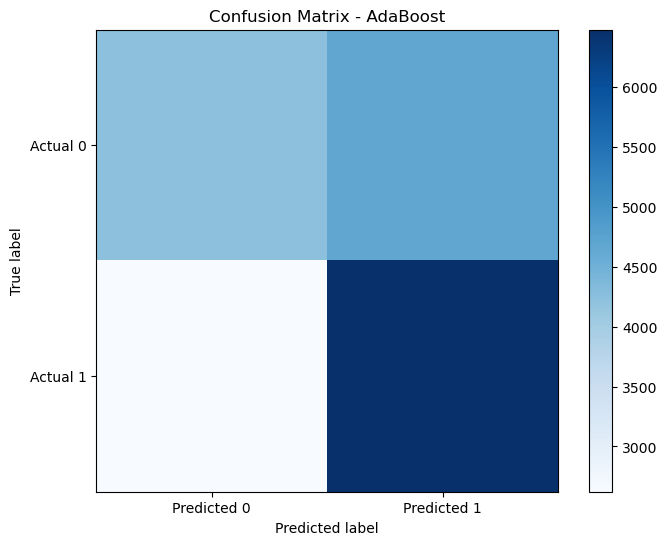

Training Histogram-based Gradient Boosting with RandomizedSearchCV...
Best parameters for Histogram-based Gradient Boosting: {'max_iter': 200, 'max_depth': 5, 'learning_rate': 0.1}

Evaluation metrics for Histogram-based Gradient Boosting:
Training Accuracy: 0.6494
Test Accuracy: 0.6193
ROC AUC: 0.6187
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      8900
           1       0.61      0.68      0.64      9100

    accuracy                           0.62     18000
   macro avg       0.62      0.62      0.62     18000
weighted avg       0.62      0.62      0.62     18000



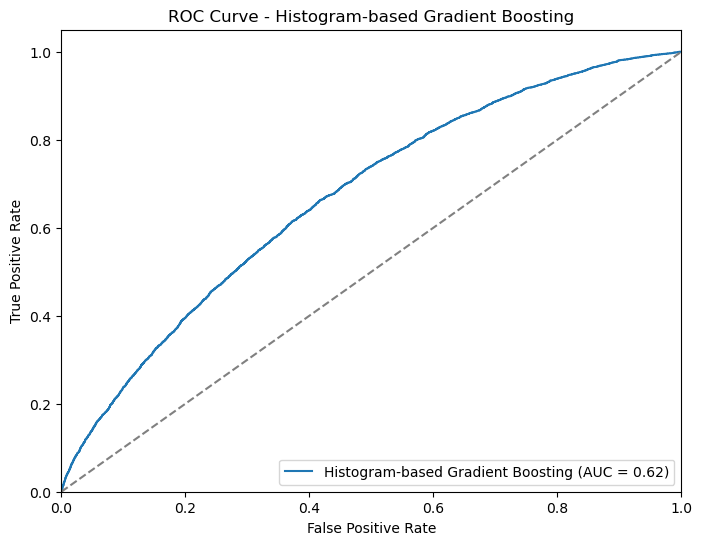

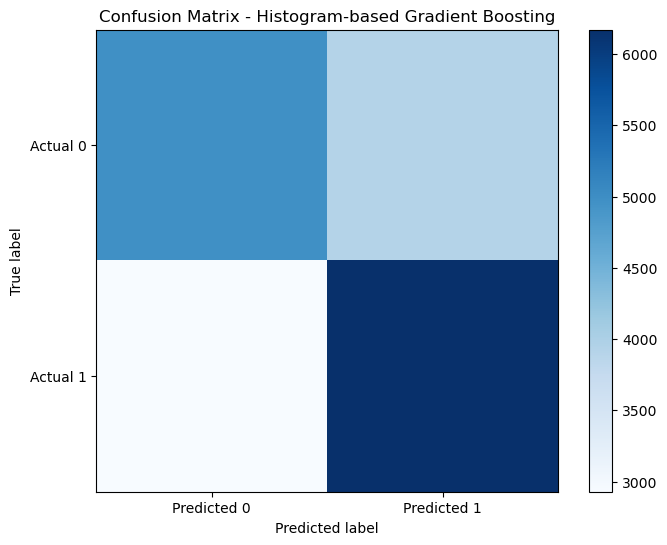


Best model 'LightGBM' saved successfully.


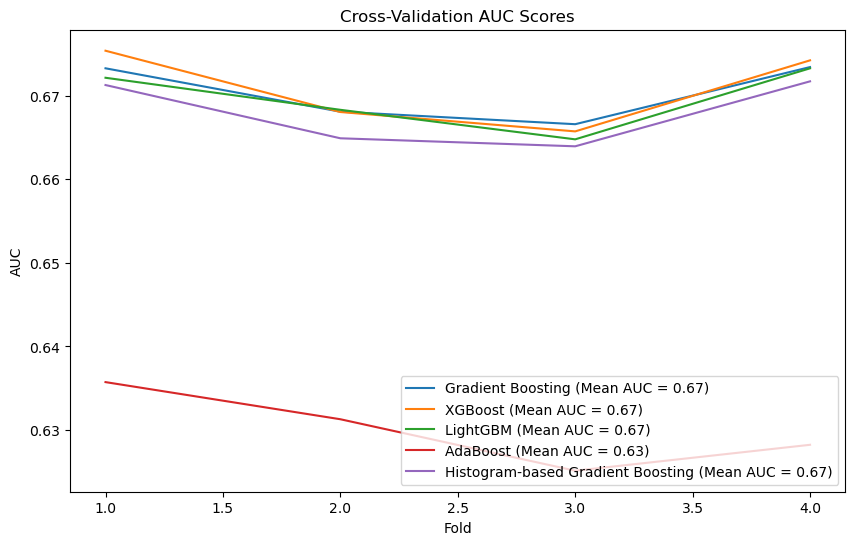


Best model based on cross-validation: XGBoost (Mean AUC = 0.67)
Worst model based on cross-validation: AdaBoost (Mean AUC = 0.63)


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib
import numpy as np

# Load selected features data
df = pd.read_csv('122.csv')

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=36)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 63]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    },
    'Histogram-based Gradient Boosting': {
        'max_iter': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=36),
    'XGBoost': XGBClassifier(random_state=36),
    'LightGBM': LGBMClassifier(random_state=36),
    'AdaBoost': AdaBoostClassifier(random_state=36),
    'Histogram-based Gradient Boosting': HistGradientBoostingClassifier(random_state=36)
}

best_model_name = None
best_roc_auc = -1
best_model = None

# For storing cross-validation results
cv_results = {}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name} with RandomizedSearchCV...")
    
    # Perform RandomizedSearchCV for hyperparameter tuning
    param_grid = param_grids[model_name]
    random_search = RandomizedSearchCV(model, param_grid, cv=4, scoring='roc_auc', n_jobs=1, n_iter=5, random_state=36)
    random_search.fit(X_train_scaled, y_train)
    
    best_model_cv = random_search.best_estimator_
    best_params = random_search.best_params_
    
    print(f"Best parameters for {model_name}: {best_params}")

    # Perform cross-validation with the best parameters
    kfold = KFold(n_splits=4, shuffle=True, random_state=36)
    cv_scores = cross_val_score(best_model_cv, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')
    cv_results[model_name] = cv_scores
    
    # Train the model on the full training data
    best_model_cv.fit(X_train_scaled, y_train)
    y_train_pred = best_model_cv.predict(X_train_scaled)
    y_test_pred = best_model_cv.predict(X_test_scaled)
    
    # Evaluate model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    
    # Print evaluation metrics
    print(f"\nEvaluation metrics for {model_name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{report}")
    
    # Save the best model based on ROC AUC
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = model_name
        best_model = best_model_cv
        best_y_test = y_test
        best_y_pred = y_test_pred
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, best_model_cv.predict_proba(X_test_scaled)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Save the best model to disk using joblib
if best_model_name:
    joblib.dump(best_model, f'best_model_{best_model_name}.joblib')
    print(f"\nBest model '{best_model_name}' saved successfully.")

# Plot cross-validation results
plt.figure(figsize=(10, 6))
for model_name, cv_scores in cv_results.items():
    plt.plot(np.arange(1, len(cv_scores) + 1), cv_scores, label=f'{model_name} (Mean AUC = {np.mean(cv_scores):.2f})')
plt.xlabel('Fold')
plt.ylabel('AUC')
plt.title('Cross-Validation AUC Scores')
plt.legend(loc='lower right')
plt.show()

# Determine the best and worst cross-validation results
mean_cv_scores = {model_name: np.mean(scores) for model_name, scores in cv_results.items()}
best_cv_model_name = max(mean_cv_scores, key=mean_cv_scores.get)
worst_cv_model_name = min(mean_cv_scores, key=mean_cv_scores.get)

print(f"\nBest model based on cross-validation: {best_cv_model_name} (Mean AUC = {mean_cv_scores[best_cv_model_name]:.2f})")
print(f"Worst model based on cross-validation: {worst_cv_model_name} (Mean AUC = {mean_cv_scores[worst_cv_model_name]:.2f})")


In [70]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to disk
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [71]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the saved XGBoost model
model = joblib.load('best_model_XGBoost.joblib')

# Load the scaler used for training
scaler = joblib.load('scaler.joblib')

# Load the 122.csv dataset
df = pd.read_csv('122.csv')

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Standardize the features using the loaded scaler
X_scaled = scaler.transform(X)

# Predict using the loaded model
predictions = model.predict(X_scaled)
prediction_probabilities = model.predict_proba(X_scaled)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': predictions})

# Add prediction probabilities to the results
for i in range(prediction_probabilities.shape[1]):
    results[f'Probability_Class_{i}'] = prediction_probabilities[:, i]

# Concatenate input features with results for display
input_features = X.reset_index(drop=True)
display_df = pd.concat([input_features, results], axis=1)

# Sample 20 random entries from the dataset
sample_df = display_df.sample(n=20, random_state=36)

# Output the sample results
print("Sample Input Features with Actual vs. Predicted Output:")
print(sample_df)

# Calculate accuracy and print classification report on the full dataset
accuracy = accuracy_score(y, predictions)
report = classification_report(y, predictions)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nClassification Report:\n{report}")


Sample Input Features with Actual vs. Predicted Output:
       roam_Mean  ovrrev_Mean  vceovr_Mean  ovrmou_Mean  months  uniqsubs  \
57031     3.1525      11.3000      11.3000        28.25      16         1   
3683      3.9500       1.8525       0.0000         4.75      39         1   
12487     0.0000       9.2750       9.2750        26.50      25         1   
35742     0.0000      79.8000      79.8000       266.00      18         1   
87007    10.2575      40.4925      40.2000       101.25       7         1   
25253     0.0000       0.0000       0.0000         0.00      19         1   
32827     0.0000       0.0000       0.0000         0.00      21         2   
74969     0.5000       0.0000       0.0000         0.00       7         1   
66674     0.0000       1.0500       1.0500         3.00      14         2   
75693     5.1875      35.1000      35.1000        87.75      11         3   
69159     1.2800       0.0000       0.0000         0.00      13         1   
45411     4.6725    

# PCA analysis

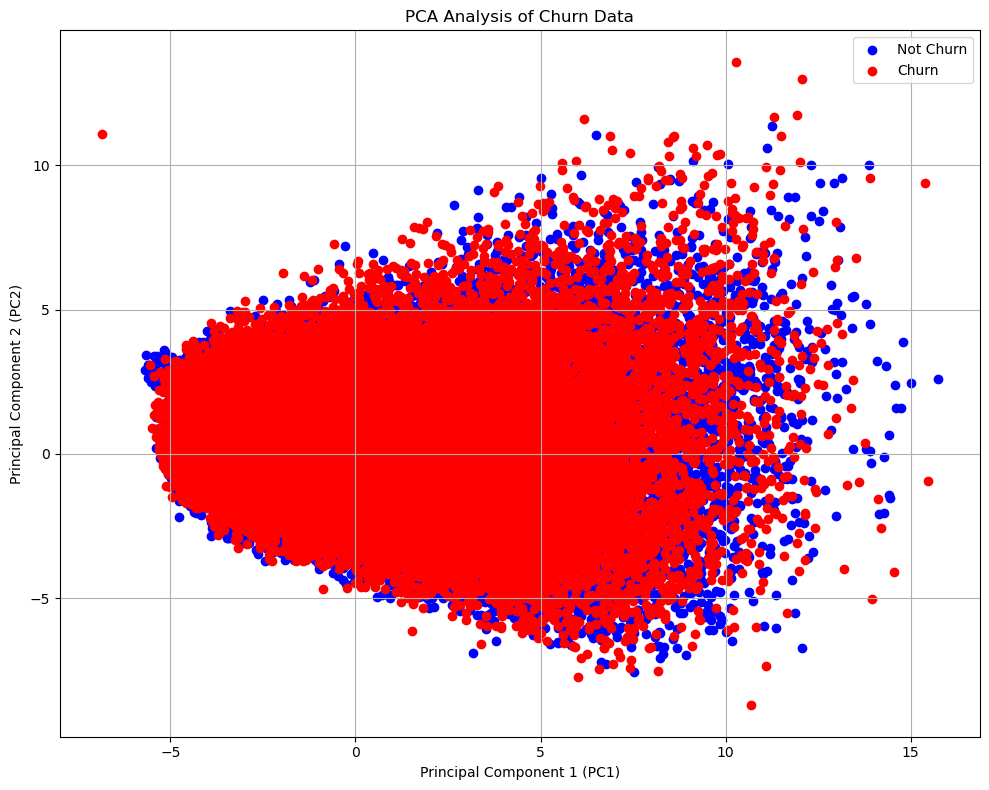

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('processed_dataset.csv')

# Select relevant features and target (churn)
features = [
    'recv_sms_Mean', 'roam_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'ovrmou_Mean',
    'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 
    'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 
    'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one', 
    'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models', 'hnd_webcap', 
    'truck', 'rv', 'marital', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 
    'kid11_15', 'kid16_17', 'creditcd', 'eqpdays'
]
target = 'churn'

# Separate features and target variable
X = df[features].values
y = df[target].values

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['churn'] = y  # Add churn status to the DataFrame

# Plot PCA results
plt.figure(figsize=(10, 8))
plt.scatter(df_pca.loc[df_pca['churn'] == 0, 'PC1'], df_pca.loc[df_pca['churn'] == 0, 'PC2'], color='b', label='Not Churn')
plt.scatter(df_pca.loc[df_pca['churn'] == 1, 'PC1'], df_pca.loc[df_pca['churn'] == 1, 'PC2'], color='r', label='Churn')
plt.title('PCA Analysis of Churn Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


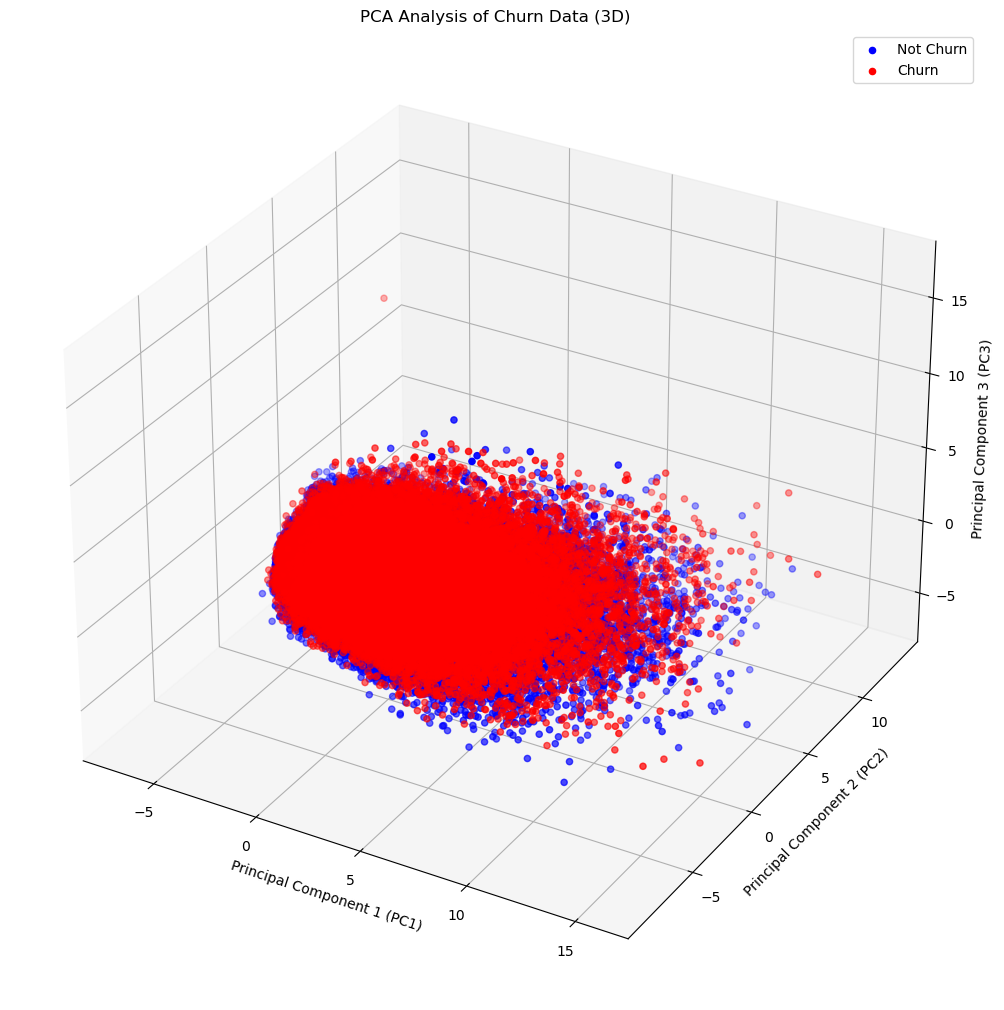

In [73]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Using 3 components for 3D visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['churn'] = y  # Add churn status to the DataFrame

# Plot PCA results in 3D
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_pca.loc[df_pca['churn'] == 0, 'PC1'], df_pca.loc[df_pca['churn'] == 0, 'PC2'], df_pca.loc[df_pca['churn'] == 0, 'PC3'], color='b', label='Not Churn')
ax.scatter(df_pca.loc[df_pca['churn'] == 1, 'PC1'], df_pca.loc[df_pca['churn'] == 1, 'PC2'], df_pca.loc[df_pca['churn'] == 1, 'PC3'], color='r', label='Churn')

# Labels and legend
ax.set_title('PCA Analysis of Churn Data (3D)')
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
ax.legend()
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume X and y are defined
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(3)])
df_pca['churn'] = y  # Add churn status to the DataFrame

# Save the PCA results to a CSV file
df_pca.to_csv('3pca.csv', index=False)


In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume X and y are defined
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 7 components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(7)])
df_pca['churn'] = y  # Add churn status to the DataFrame

# Save the PCA results to a CSV file
df_pca.to_csv('7pca.csv', index=False)


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume X and y are defined
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 9 components
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(9)])
df_pca['churn'] = y  # Add churn status to the DataFrame

# Save the PCA results to a CSV file
df_pca.to_csv('9pca.csv', index=False)
